#Predicting Wine Quality

##Phase 1

###Group 56:

Peter Hong               - s3603591

Hin Yeung Samuel Chan    - s3941488

Antony Kurian            - s3931991

Kelvin Cam Khon Duong Ly - s3953996

Kai Hei Ho               - s3865353


---

## Table of contents


*   [Introduction](https://colab.research.google.com/drive/1xnbNdr4BLNm6UVXh9Bc6xgV0p4XkoM6c?authuser=1#scrollTo=hs8enYJWN2No)
 * [Dataset Source](https://colab.research.google.com/drive/1xnbNdr4BLNm6UVXh9Bc6xgV0p4XkoM6c?authuser=1#scrollTo=WubrhKIcZvcD)
 * [Dataset Details](https://colab.research.google.com/drive/1xnbNdr4BLNm6UVXh9Bc6xgV0p4XkoM6c?authuser=1#scrollTo=Fij-cWr4Z1kY)
 * [Dataset Features](https://colab.research.google.com/drive/1xnbNdr4BLNm6UVXh9Bc6xgV0p4XkoM6c?authuser=1#scrollTo=WPzLUR2j39G8)
 * [Reponse Variable](https://colab.research.google.com/drive/1xnbNdr4BLNm6UVXh9Bc6xgV0p4XkoM6c?authuser=1#scrollTo=eR6PhIdAaFeG&line=1&uniqifier=1)
* [Goals and Objectives](https://colab.research.google.com/drive/1xnbNdr4BLNm6UVXh9Bc6xgV0p4XkoM6c?authuser=1#scrollTo=WWko4TPwNSl6)
* [Data Cleaning and Preprocessing](https://colab.research.google.com/drive/1xnbNdr4BLNm6UVXh9Bc6xgV0p4XkoM6c?authuser=1#scrollTo=BOyRD2paonrh&line=1&uniqifier=1)
* [Data Exploration and Visualisation](https://colab.research.google.com/drive/1xnbNdr4BLNm6UVXh9Bc6xgV0p4XkoM6c?authuser=1#scrollTo=SCf7bgbNVTii&line=1&uniqifier=1)
* [Literature Review](https://colab.research.google.com/drive/1xnbNdr4BLNm6UVXh9Bc6xgV0p4XkoM6c?authuser=1#scrollTo=zbx48x9BhF8i&line=1&uniqifier=1)

* [References](https://colab.research.google.com/drive/1xnbNdr4BLNm6UVXh9Bc6xgV0p4XkoM6c?authuser=1#scrollTo=3OToySGnn-E4&line=1&uniqifier=1)

* [Summary and Conclusion](https://colab.research.google.com/drive/1xnbNdr4BLNm6UVXh9Bc6xgV0p4XkoM6c?authuser=1#scrollTo=i0Ta-96JpEU9&line=1&uniqifier=1)


## Introduction

### Dataset Source
The Wine Quality Dataset used in this study is sourced from UCI Machine Learning Repository. This dataset is a combination of two datasets, red wine and white wine variants of the same wine. The dataset was donated in 2009.

### Dataset details
The dataset is about the wine quality of various types of Portuguese "Vinho Verde" wine each of a different brand and name. It contains information on the physiochemical levels of acidity, sugar, chlorides, sulfur dioxide, density, pH, sulphates and alcohol as feature attributes. And a judgement score (0 - 10) of the wine quality using human senses. 

The dataset has a total of 12 attributes, 11 are independent and 1 is dependent, and a combined total of 6,497 observations, red and white wine has 1,599 and 4,898 respectively. This dataset does not include data of wine name, price, or grape type. We have removed the outliers.
#### Dataset retrieval
*   We read in the dataset directly from the UCI repository and loaded the 
modules that we will use for our report.
*   We have displayed 10 randomly sampled items in our dataframe.

In [ ]:
import warnings
warnings.filterwarnings("ignore")
import io
import requests
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
plt.style.use("seaborn")
pd.set_option('display.max_columns', None)

In [ ]:
url = ('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv',
       'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv')

In [ ]:
col = ['fixed acidity',
       'volatile acidity',
       'citric acid',
       'residual sugar',
       'chlorides',
       'free sulfur dioxide',
       'total sulfur dioxide',
       'density',
       'pH',
       'sulphates',
       'alcohol',
       'quality']

In [ ]:
# Red wine dataset
url_content = requests.get(url[0], verify=False).content
red_wine = pd.read_csv(io.StringIO(url_content.decode('utf-8')),sep=';')
# White wine dataset
url_content = requests.get(url[1], verify=False).content
white_wine = pd.read_csv(io.StringIO(url_content.decode('utf-8')),sep=';')

# Adding a column in both datasets with wine type
red_wine['wine type'] = 'red'
white_wine['wine type'] = 'white'

In [ ]:
# Combining both datasets
df = pd.concat([red_wine,white_wine])

In [ ]:
df.sample(n=10,random_state=99)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine type
1188,7.1,0.21,0.30,1.40,0.037,45.0,143.0,0.99320,3.13,0.33,9.9,6,white
3031,5.8,0.19,0.25,10.80,0.042,33.0,124.0,0.99646,3.22,0.41,9.2,6,white
839,7.5,0.34,0.35,6.00,0.034,12.0,126.0,0.99240,3.16,0.39,12.0,7,white
83,7.3,0.22,0.30,8.20,0.047,42.0,207.0,0.99660,3.33,0.46,9.5,6,white
290,7.2,0.23,0.39,14.20,0.058,49.0,192.0,0.99790,2.98,0.48,9.0,7,white
845,7.3,0.21,0.29,1.60,0.034,29.0,118.0,0.99170,3.30,0.50,11.0,8,white
410,9.0,0.43,0.34,2.50,0.080,26.0,86.0,0.99870,3.38,0.62,9.5,6,red
3936,5.7,0.23,0.25,7.95,0.042,16.0,108.0,0.99486,3.44,0.61,10.3,6,white
3642,6.0,0.25,0.40,5.70,0.052,56.0,152.0,0.99398,3.16,0.88,10.5,6,white
1643,8.1,0.30,0.49,12.30,0.049,50.0,144.0,0.99710,3.09,0.57,10.2,7,white


In [ ]:
df.shape

(6497, 13)

### Dataset Features
The features in our dataset are described in the following table below.

In [272]:
from tabulate import tabulate

table = [['Name', 'Data Type', 'Units', 'Description'],
      ['fixed acidity','numeric','g/L','Acidity that won\'t evaporate'],
      ['volatile acidity','numeric','g/L','The primary acid in wine is acetic acid, responsible for the smell and taste vinegar'],
      ['citric acid','numeric','g/L','Provides wine its fresh flavour and increases acidity'],
      ['residual sugar','numeric','g/L','The amount of sugar remaining after fermentation'],
      ['chlorides','numeric','g/L','The amount of salt in the wine'],
      ['free sulfur dioxide','numeric','mg/L','The free form of sulfer dioxide (SO2), prevents oxidation and microbial growth in wine'],
      ['total sulfur dioxide','numeric','mg/L','The total free and bound sulfer dioxide, becomes noticable at high levels'],
      ['density','numeric','g/L','How close the density of wine is to water which is at 1.\nMost wine is at least 8-9% denser than water'],
      ['pH','numeric','NA','Describes how acidic or basic the wine is from a scale of 0 (highly acidic) to 14 (very basic).\nHigher quality wines are at around 3.4 to 3.5'],
      ['sulphates','numeric','g/L','Or sulphites are the preservatives and antioxidants in wine.\nTypically used to prevent bacteria from spoiling wine.'],
      ['alcohol','numeric','percentage','The percentage of alcohol in wine'],
      ['quality','numeric','0-10','0 - the worst tasting\n10 - the best tasting'],
      ['wine type','nominal categorical','NA','Red or white wine']]

print(tabulate(table, headers='firstrow', tablefmt='grid'))

+----------------------+---------------------+------------+-------------------------------------------------------------------------------------------------+
| Name                 | Data Type           | Units      | Description                                                                                     |
+======================+=====================+============+=================================================================================================+
| fixed acidity        | numeric             | g/L        | Acidity that won't evaporate                                                                    |
+----------------------+---------------------+------------+-------------------------------------------------------------------------------------------------+
| volatile acidity     | numeric             | g/L        | The primary acid in wine is acetic acid, responsible for the smell and taste vinegar            |
+----------------------+---------------------+------

All numerical features are relevant and contribute to determining the taste and/or quality of wine.

### Response Variable

For this project, the target feature will be the wine quality measured from one to ten, with ten being the best tasting. The quality of wine will be predicted based on physiochemical numerical variables.

---

## Goals and Objectives



Millions of people around the world drink wine nearly every day and feel the need to drink good quality wine from all over the world. The quality of wine is usually determined by the senses of judges in competitions and other similar events. It is usually not determined using physiochemical variables.

The main objective of modelling this particular dataset is to observe if wine quality can be determined by these other variables and if certain physiochemical variables have a strong effect over the others to attain a high score. The secondary objective is exploring the dataset, performing some data analysis through basic number summaries and data visualisation. Using this to observe which variable has a clear effect on the other and what patterns that may appear that contribute to a low score.

Prior to completing these objectives, we must perform some data cleaning and pre-processing which is the subject of Phase 1. We can assume that each observation in the dataset is not related other than being wine of the Vinho Verde Region, Porto, Portugal. We must assume that wine quality scores were determined without bias and based on preference. 


---

## Data Cleaning and Preprocessing

In this section, we describe the steps taken for cleaning and preprocessing for this project.

### Data Cleaning Steps
*   Check and rename/ modify some column names
*   Random sampling of the dataset for 5000 rows
*   Check for missing values




### Checking and modifying columns

Added 

In [ ]:
# # Adding a column in both datasets with wine type
# red_wine['wine type'] = 'red'
# white_wine['wine type'] = 'white'

### Random Sampling
As the data has more than 5000 rows, random sampling is done to only get 5000 rows out of the remaining 6497 rows for ease of computation. As there is a higher number of instances for white wine, 3401 rows out of the 4898 rows in white wine will be sampled to create a slightly more balanced dataset in terms of red to white wine ratio.

In [ ]:
white_wine = white_wine.sample(n=3401, random_state=999)

In [ ]:
# Combining both datasets
df = pd.concat([red_wine,white_wine])

df.sample(n=5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine type
3111,6.5,0.23,0.39,1.90,0.036,41.0,98.0,0.99000,3.19,0.43,11.9,7,white
293,6.9,0.36,0.25,2.40,0.098,5.0,16.0,0.99640,3.41,0.60,10.1,6,red
148,6.3,0.34,0.33,4.60,0.034,19.0,80.0,0.99170,3.38,0.58,12.0,7,white
1220,6.4,0.23,0.33,1.15,0.044,15.5,217.5,0.99200,3.33,0.44,11.0,6,white
3837,8.0,0.27,0.33,1.20,0.050,41.0,103.0,0.99002,3.00,0.45,12.4,6,white


In [ ]:
df.shape

(5000, 13)

### Missing Values
As you can see below, there are no missing values in the dataset.

In [ ]:
print(f'Number of entries in the dataset: {df.shape[0]*df.shape[1]}')
print(f'Number of missing values: {df.isnull().sum().sum()}')

Number of entries in the dataset: 65000
Number of missing values: 0


### Outliers

In [ ]:
## fixed acidity outlier
fixed_acidity_mean = df["fixed acidity"].mean()
fixed_acidity_median = df["fixed acidity"].median()
fixed_acidity_Q1 = df["fixed acidity"].quantile(0.25)
fixed_acidity_Q3 = df["fixed acidity"].quantile(0.75)
fixed_acidity_IQR = fixed_acidity_Q3 - fixed_acidity_Q1
fixed_acidity_min_whisker = fixed_acidity_Q1 - 1.5*fixed_acidity_IQR
fixed_acidity_max_whisker = fixed_acidity_Q3 + 1.5*fixed_acidity_IQR
fixed_acidity_outliers = df[(df["fixed acidity"] > fixed_acidity_max_whisker) | (df["fixed acidity"] < fixed_acidity_min_whisker)].shape[0]

## volatile acidity outlier
volatile_acidity_mean = df["volatile acidity"].mean()
volatile_acidity_Q1 = df["volatile acidity"].quantile(0.25)
volatile_acidity_Q3 = df["volatile acidity"].quantile(0.75)
volatile_acidity_IQR = volatile_acidity_Q3 - volatile_acidity_Q1
volatile_acidity_min_whisker = volatile_acidity_Q1 - 1.5*volatile_acidity_IQR
volatile_acidity_max_whisker = volatile_acidity_Q3 + 1.5*volatile_acidity_IQR
volatile_acidity_outliers = df[(df["volatile acidity"] > volatile_acidity_max_whisker) | (df["volatile acidity"] < volatile_acidity_min_whisker)].shape[0]

## citric acidity outlier
citric_acid_mean = df["citric acid"].mean()
citric_acid_Q1 = df["citric acid"].quantile(0.25)
citric_acid_Q3 = df["citric acid"].quantile(0.75)
citric_acid_IQR = citric_acid_Q3 - citric_acid_Q1
citric_acid_min_whisker = citric_acid_Q1 - 1.5*citric_acid_IQR
citric_acid_max_whisker = citric_acid_Q3 + 1.5*citric_acid_IQR
citric_acid_outliers = df[(df["citric acid"] > citric_acid_max_whisker) | (df["citric acid"] < citric_acid_min_whisker)].shape[0]

## residual sugar outlier
residual_sugar_mean = df["residual sugar"].mean()
residual_sugar_Q1 = df["residual sugar"].quantile(0.25)
residual_sugar_Q3 = df["residual sugar"].quantile(0.75)
residual_sugar_IQR = residual_sugar_Q3 - residual_sugar_Q1
residual_sugar_min_whisker = residual_sugar_Q1 - 1.5*residual_sugar_IQR
residual_sugar_max_whisker = residual_sugar_Q3 + 1.5*residual_sugar_IQR
residual_sugar_outliers = df[(df["residual sugar"] > residual_sugar_max_whisker) | (df["residual sugar"] < residual_sugar_min_whisker)].shape[0]

## chlorides outlier
chlorides_mean = df["chlorides"].mean()
chlorides_Q1 = df["chlorides"].quantile(0.25)
chlorides_Q3 = df["chlorides"].quantile(0.75)
chlorides_IQR = chlorides_Q3 - chlorides_Q1
chlorides_min_whisker = chlorides_Q1 - 1.5*chlorides_IQR
chlorides_max_whisker = chlorides_Q3 + 1.5*chlorides_IQR
chlorides_outliers = df[(df["chlorides"] > chlorides_max_whisker) | (df["chlorides"] < chlorides_min_whisker)].shape[0]

## free sulfur dioxide outlier
free_sulfur_dioxide_mean = df["free sulfur dioxide"].mean()
free_sulfur_dioxide_Q1 = df["free sulfur dioxide"].quantile(0.25)
free_sulfur_dioxide_Q3 = df["free sulfur dioxide"].quantile(0.75)
free_sulfur_dioxide_IQR = free_sulfur_dioxide_Q3 - free_sulfur_dioxide_Q1
free_sulfur_dioxide_min_whisker = free_sulfur_dioxide_Q1 - 1.5*free_sulfur_dioxide_IQR
free_sulfur_dioxide_max_whisker = free_sulfur_dioxide_Q3 + 1.5*free_sulfur_dioxide_IQR
free_sulfur_dioxide_outliers = df[(df["free sulfur dioxide"] > free_sulfur_dioxide_max_whisker) | (df["free sulfur dioxide"] < free_sulfur_dioxide_min_whisker)].shape[0]

## total sulfur dioxide outlier
total_sulfur_dioxide_mean = df["total sulfur dioxide"].mean()
total_sulfur_dioxide_Q1 = df["total sulfur dioxide"].quantile(0.25)
total_sulfur_dioxide_Q3 = df["total sulfur dioxide"].quantile(0.75)
total_sulfur_dioxide_IQR = total_sulfur_dioxide_Q3 - total_sulfur_dioxide_Q1
total_sulfur_dioxide_min_whisker = total_sulfur_dioxide_Q1 - 1.5*total_sulfur_dioxide_IQR
total_sulfur_dioxide_max_whisker = total_sulfur_dioxide_Q3 + 1.5*total_sulfur_dioxide_IQR
total_sulfur_dioxide_outliers = df[(df["total sulfur dioxide"] > total_sulfur_dioxide_max_whisker) | (df["total sulfur dioxide"] < total_sulfur_dioxide_min_whisker)].shape[0]

## density outlier
density_mean = df["density"].mean()
density_Q1 = df["density"].quantile(0.25)
density_Q3 = df["density"].quantile(0.75)
density_IQR = density_Q3 - density_Q1
density_min_whisker = density_Q1 - 1.5*density_IQR
density_max_whisker = density_Q3 + 1.5*density_IQR
density_outliers = df[(df["density"] > density_max_whisker) | (df["density"] < density_min_whisker)].shape[0]

## pH outlier
pH_mean = df["pH"].mean()
pH_Q1 = df["pH"].quantile(0.25)
pH_Q3 = df["pH"].quantile(0.75)
pH_IQR = pH_Q3 - pH_Q1
pH_min_whisker = pH_Q1 - 1.5*pH_IQR
pH_max_whisker = pH_Q3 + 1.5*pH_IQR
pH_outliers = df[(df["pH"] > pH_max_whisker) | (df["pH"] < pH_min_whisker)].shape[0]

## sulphates outlier
sulphates_mean = df["sulphates"].mean()
sulphates_Q1 = df["sulphates"].quantile(0.25)
sulphates_Q3 = df["sulphates"].quantile(0.75)
sulphates_IQR = sulphates_Q3 - sulphates_Q1
sulphates_min_whisker = sulphates_Q1 - 1.5*sulphates_IQR
sulphates_max_whisker = sulphates_Q3 + 1.5*sulphates_IQR
sulphates_outliers = df[(df["sulphates"] > sulphates_max_whisker) | (df["sulphates"] < sulphates_min_whisker)].shape[0]

## alcohol outlier
alcohol_mean = df["alcohol"].mean()
alcohol_Q1 = df["alcohol"].quantile(0.25)
alcohol_Q3 = df["alcohol"].quantile(0.75)
alcohol_IQR = alcohol_Q3 - alcohol_Q1
alcohol_min_whisker = alcohol_Q1 - 1.5*alcohol_IQR
alcohol_max_whisker = alcohol_Q3 + 1.5*alcohol_IQR
alcohol_outliers = df[(df["alcohol"] > alcohol_max_whisker) | (df["alcohol"] < alcohol_min_whisker)].shape[0]

## quality outlier
quality_mean = df["quality"].mean()
quality_Q1 = df["quality"].quantile(0.25)
quality_Q3 = df["quality"].quantile(0.75)
quality_IQR = quality_Q3 - quality_Q1
quality_min_whisker = quality_Q1 - 1.5*quality_IQR
quality_max_whisker = quality_Q3 + 1.5*quality_IQR
quality_outliers = df[(df["quality"] > quality_max_whisker) | (df["quality"] < quality_min_whisker)].shape[0]

In [262]:
# Removal of outliers that are disproportionate to the rest of the dataset
df = df[df['residual sugar'] != df['residual sugar'].max()]




Our dataset is now clean and ready to explore and visualise the dataset.

---

## Data Exploration and Visualisation

### Summary of each variable

In [ ]:
## fixed acidity
print('Fixed Acidity')
fixed_acidity_table = [['Minimum:',df["fixed acidity"].min()],
                       ['Quantile 1:',df["fixed acidity"].quantile(0.25)],
                       ['Median:',df["fixed acidity"].median()],
                       ['Mean:',df["fixed acidity"].mean()],
                       ['Quantile 3:',df["fixed acidity"].quantile(0.75)],
                       ['Maximum:',df["fixed acidity"].max()]]
print(f'{tabulate(fixed_acidity_table)}\n')

## volatile acidity outlier
print('\nVolatile Acidity')
volatile_acidity_table = [['Minimum:',df["volatile acidity"].min()],
                       ['Quantile 1:',df["volatile acidity"].quantile(0.25)],
                       ['Median:',df["volatile acidity"].median()],
                       ['Mean:',df["volatile acidity"].mean()],
                       ['Quantile 3:',df["volatile acidity"].quantile(0.75)],
                       ['Maximum:',df["volatile acidity"].max()]]
print(f'{tabulate(volatile_acidity_table)}\n')

## citric acid
print('\nCitric Acid')
citric_acid_table = [['Minimum:',df["citric acid"].min()],
                       ['Quantile 1:',df["citric acid"].quantile(0.25)],
                       ['Median:',df["citric acid"].median()],
                       ['Mean:',df["citric acid"].mean()],
                       ['Quantile 3:',df["citric acid"].quantile(0.75)],
                       ['Maximum:',df["citric acid"].max()]]
print(f'{tabulate(citric_acid_table)}\n')

## residual sugar
print('Residual Sugar')
residual_sugar_table = [['Minimum:',df["residual sugar"].min()],
                       ['Quantile 1:',df["residual sugar"].quantile(0.25)],
                       ['Median:',df["residual sugar"].median()],
                       ['Mean:',df["residual sugar"].mean()],
                       ['Quantile 3:',df["residual sugar"].quantile(0.75)],
                       ['Maximum:',df["residual sugar"].max()]]
print(f'{tabulate(residual_sugar_table)}\n')

## chlorides
print('Chlorides')
chlorides_table = [['Minimum:',df["chlorides"].min()],
                       ['Quantile 1:',df["chlorides"].quantile(0.25)],
                       ['Median:',df["chlorides"].median()],
                       ['Mean:',df["chlorides"].mean()],
                       ['Quantile 3:',df["chlorides"].quantile(0.75)],
                       ['Maximum:',df["chlorides"].max()]]
print(f'{tabulate(chlorides_table)}\n')

## free sulfur dioxide
print('Free Sulfer Dioxide')
free_so2_table = [['Minimum:',df["free sulfur dioxide"].min()],
                       ['Quantile 1:',df["free sulfur dioxide"].quantile(0.25)],
                       ['Median:',df["free sulfur dioxide"].median()],
                       ['Mean:',df["free sulfur dioxide"].mean()],
                       ['Quantile 3:',df["free sulfur dioxide"].quantile(0.75)],
                       ['Maximum:',df["free sulfur dioxide"].max()]]
print(f'{tabulate(free_so2_table)}\n')

## total sulfur dioxide
print('Total Sulfer Dioxide')
total_so2_table = [['Minimum:',df["total sulfur dioxide"].min()],
                       ['Quantile 1:',df["total sulfur dioxide"].quantile(0.25)],
                       ['Median:',df["total sulfur dioxide"].median()],
                       ['Mean:',df["total sulfur dioxide"].mean()],
                       ['Quantile 3:',df["total sulfur dioxide"].quantile(0.75)],
                       ['Maximum:',df["total sulfur dioxide"].max()]]
print(f'{tabulate(total_so2_table)}\n')

## density
print('Density')
density_table = [['Minimum:',df["density"].min()],
                       ['Quantile 1:',df["density"].quantile(0.25)],
                       ['Median:',df["density"].median()],
                       ['Mean:',df["density"].mean()],
                       ['Quantile 3:',df["density"].quantile(0.75)],
                       ['Maximum:',df["density"].max()]]
print(f'{tabulate(density_table)}\n')

## pH
print('pH')
pH_table = [['Minimum:',df["pH"].min()],
                       ['Quantile 1:',df["pH"].quantile(0.25)],
                       ['Median:',df["pH"].median()],
                       ['Mean:',df["pH"].mean()],
                       ['Quantile 3:',df["pH"].quantile(0.75)],
                       ['Maximum:',df["pH"].max()]]
print(f'{tabulate(pH_table)}\n')

## sulphates
print('Sulphates')
sulphates_table = [['Minimum:',df["sulphates"].min()],
                       ['Quantile 1:',df["sulphates"].quantile(0.25)],
                       ['Median:',df["sulphates"].median()],
                       ['Mean:',df["sulphates"].mean()],
                       ['Quantile 3:',df["sulphates"].quantile(0.75)],
                       ['Maximum:',df["sulphates"].max()]]
print(f'{tabulate(sulphates_table)}\n')

## alcohol
print('Alcohol')
alcohol_table = [['Minimum:',df["alcohol"].min()],
                       ['Quantile 1:',df["alcohol"].quantile(0.25)],
                       ['Median:',df["alcohol"].median()],
                       ['Mean:',df["alcohol"].mean()],
                       ['Quantile 3:',df["alcohol"].quantile(0.75)],
                       ['Maximum:',df["alcohol"].max()]]
print(f'{tabulate(alcohol_table)}\n')

## quality
print('Wine Quality')
quality_table = [['Minimum:',df["quality"].min()],
                       ['Quantile 1:',df["quality"].quantile(0.25)],
                       ['Median:',df["quality"].median()],
                       ['Mean:',df["quality"].mean()],
                       ['Quantile 3:',df["quality"].quantile(0.75)],
                       ['Maximum:',df["quality"].max()]]
print(f'{tabulate(quality_table)}\n')



Fixed Acidity
-----------  --------
Minimum:      3.8
Quantile 1:   6.4
Median:       7
Mean:         7.31636
Quantile 3:   7.8
Maximum:     15.9
-----------  --------


Volatile Acidity
-----------  --------
Minimum:     0.08
Quantile 1:  0.23
Median:      0.305
Mean:        0.357674
Quantile 3:  0.44
Maximum:     1.58
-----------  --------


Citric Acid
-----------  --------
Minimum:     0
Quantile 1:  0.24
Median:      0.31
Mean:        0.314051
Quantile 3:  0.4
Maximum:     1
-----------  --------

Residual Sugar
-----------  --------
Minimum:      0.6
Quantile 1:   1.8
Median:       2.7
Mean:         5.20658
Quantile 3:   7.8
Maximum:     31.6
-----------  --------

Chlorides
-----------  ---------
Minimum:     0.012
Quantile 1:  0.039
Median:      0.049
Mean:        0.0592094
Quantile 3:  0.073
Maximum:     0.611
-----------  ---------

Free Sulfer Dioxide
-----------  --------
Minimum:       1
Quantile 1:   15
Median:       27
Mean:         29.2378
Quantile 3:   40
Maximum:     

### Univariate Visualisation

**Histogram of Fixed Acidity in both White and Red Wine**

It can be observed that the average fixed acidity in each sample is around 7. The median being 7.0 and the mean being 7.22. The data also seems to be right skewed so the median would be a better indicator than the mean.

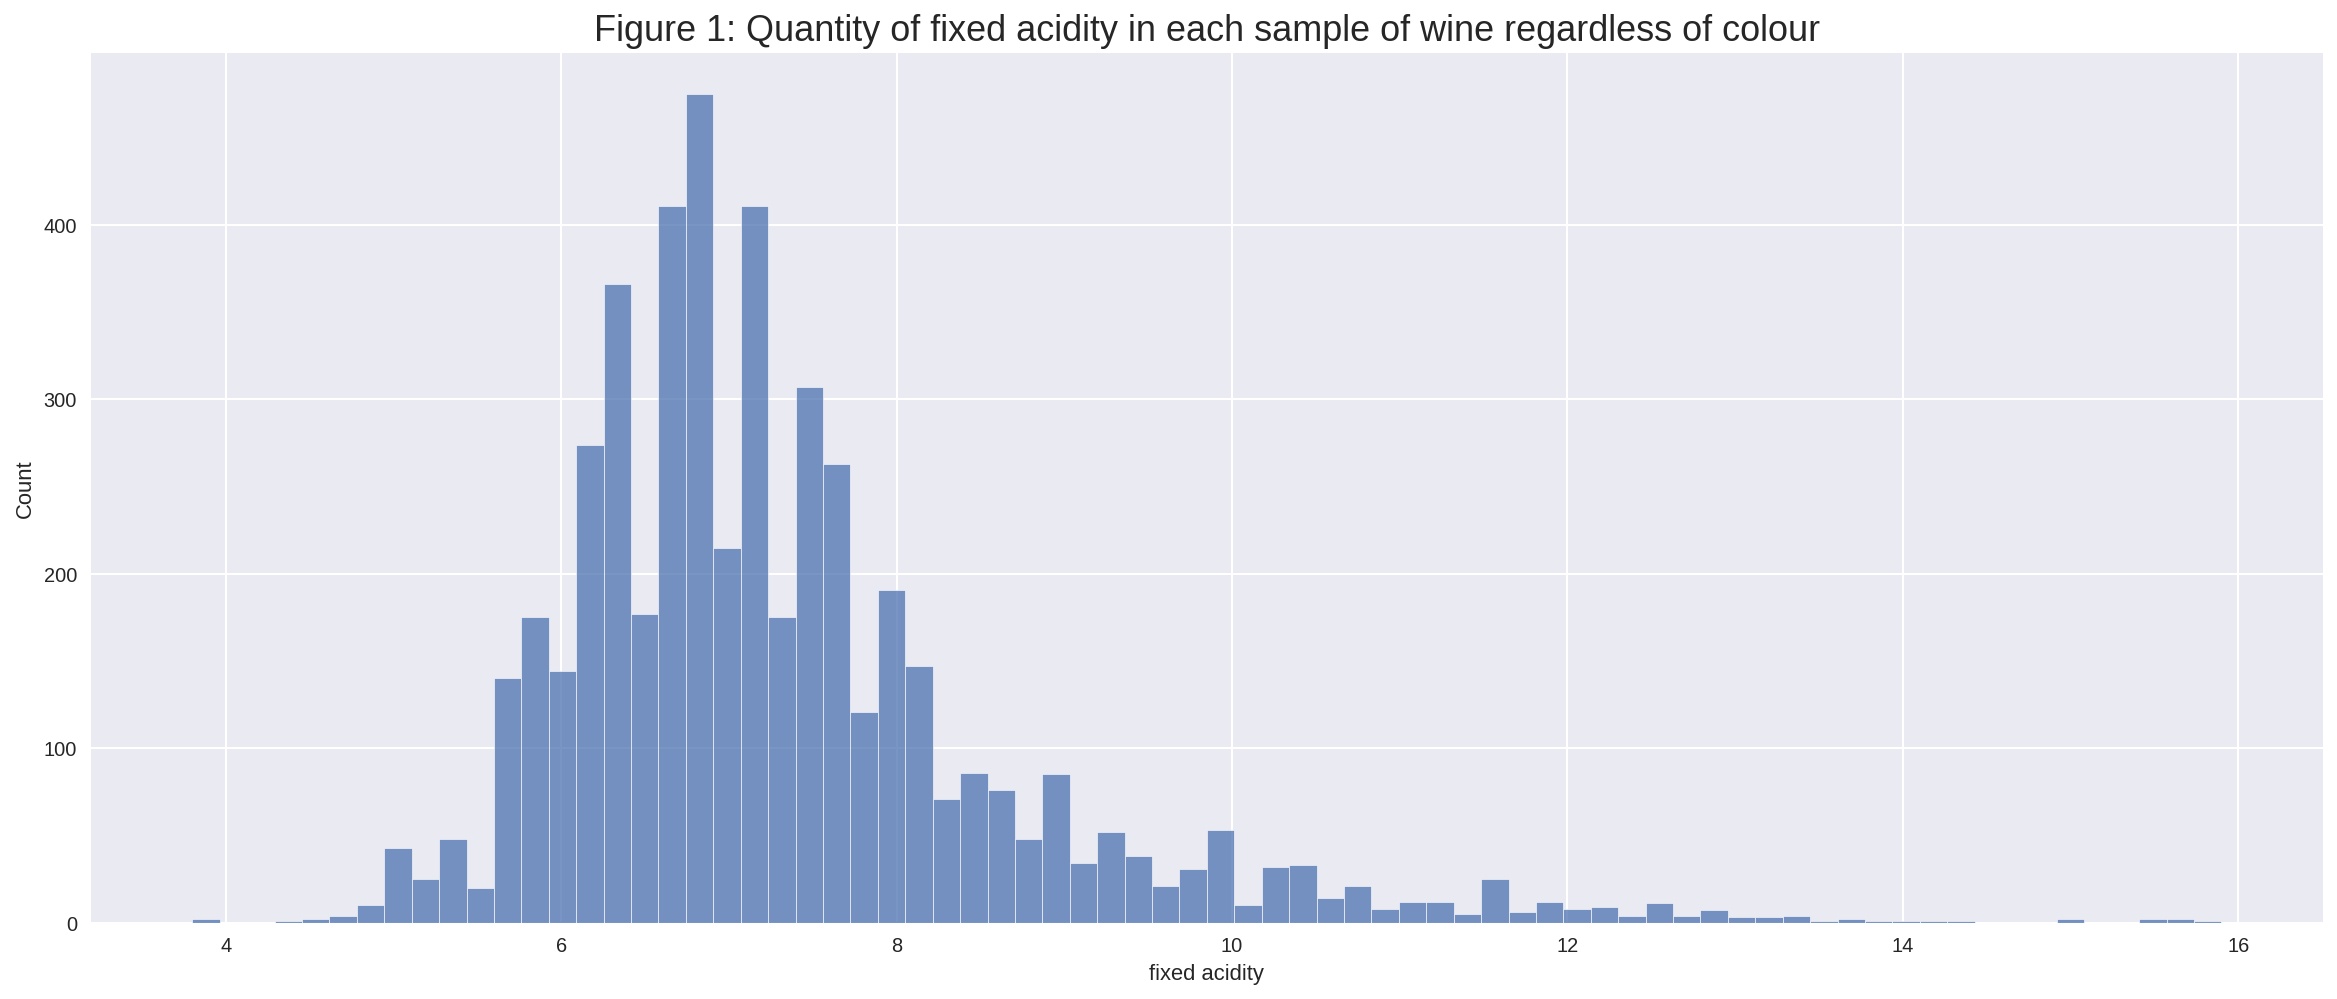

In [ ]:
plt.figure(figsize = (20,8))
fig = sns.histplot(data = df["fixed acidity"])
fig = plt.title('Figure 1: Quantity of fixed acidity in each sample of wine regardless of colour', fontsize = 18)
plt.show()

**Histogram of pH values of different sample wine**

Figure 2 shows the acidity of the dataset


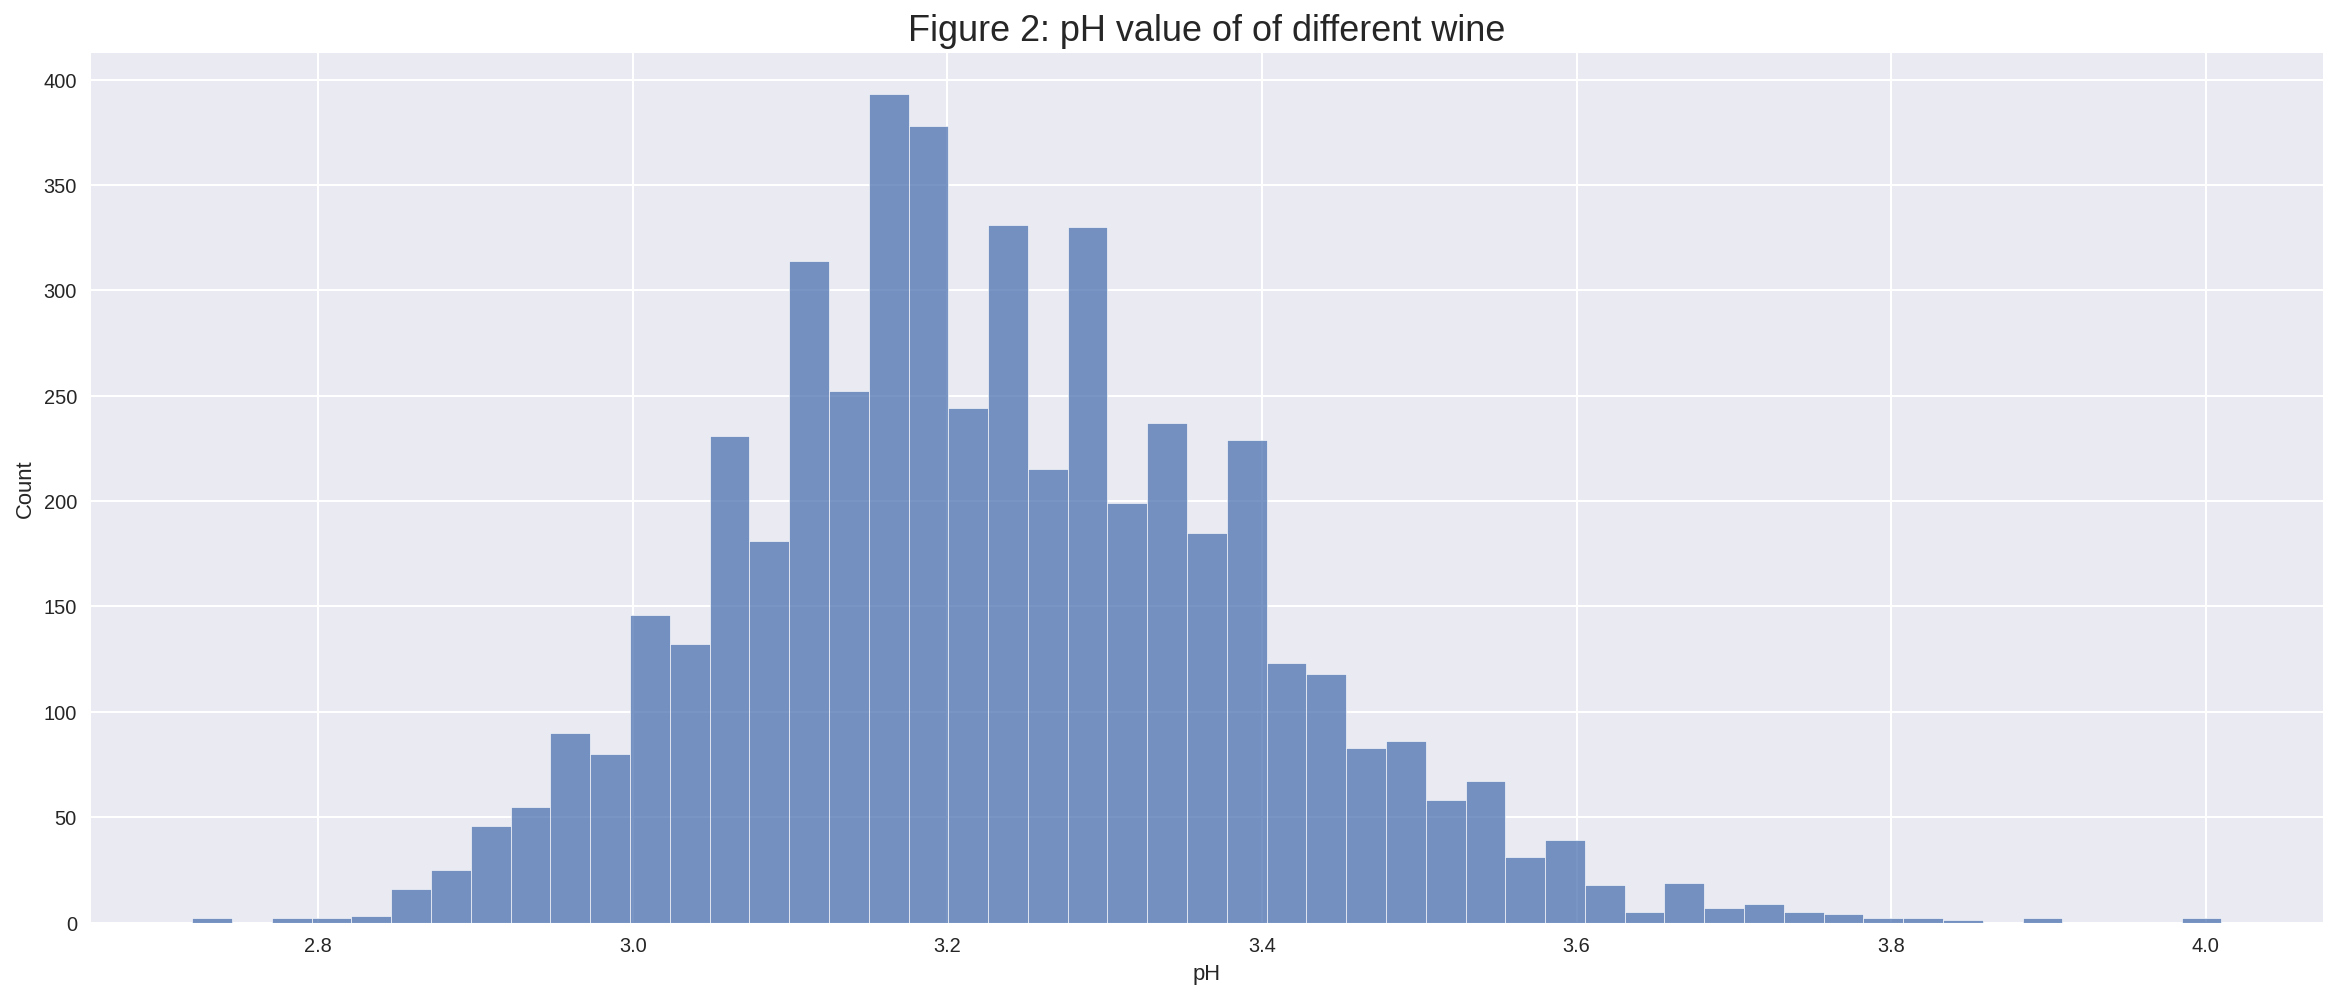

In [ ]:
plt.figure(figsize = (20,8))
a = sns.histplot(data = df["pH"])
a = plt.title('Figure 2: pH value of of different wine', fontsize = 18)
plt.show()

**Histogram of quality**

This shows that this dataset is unbalanced and has more normal/average wines than bad or amazing quality wines.

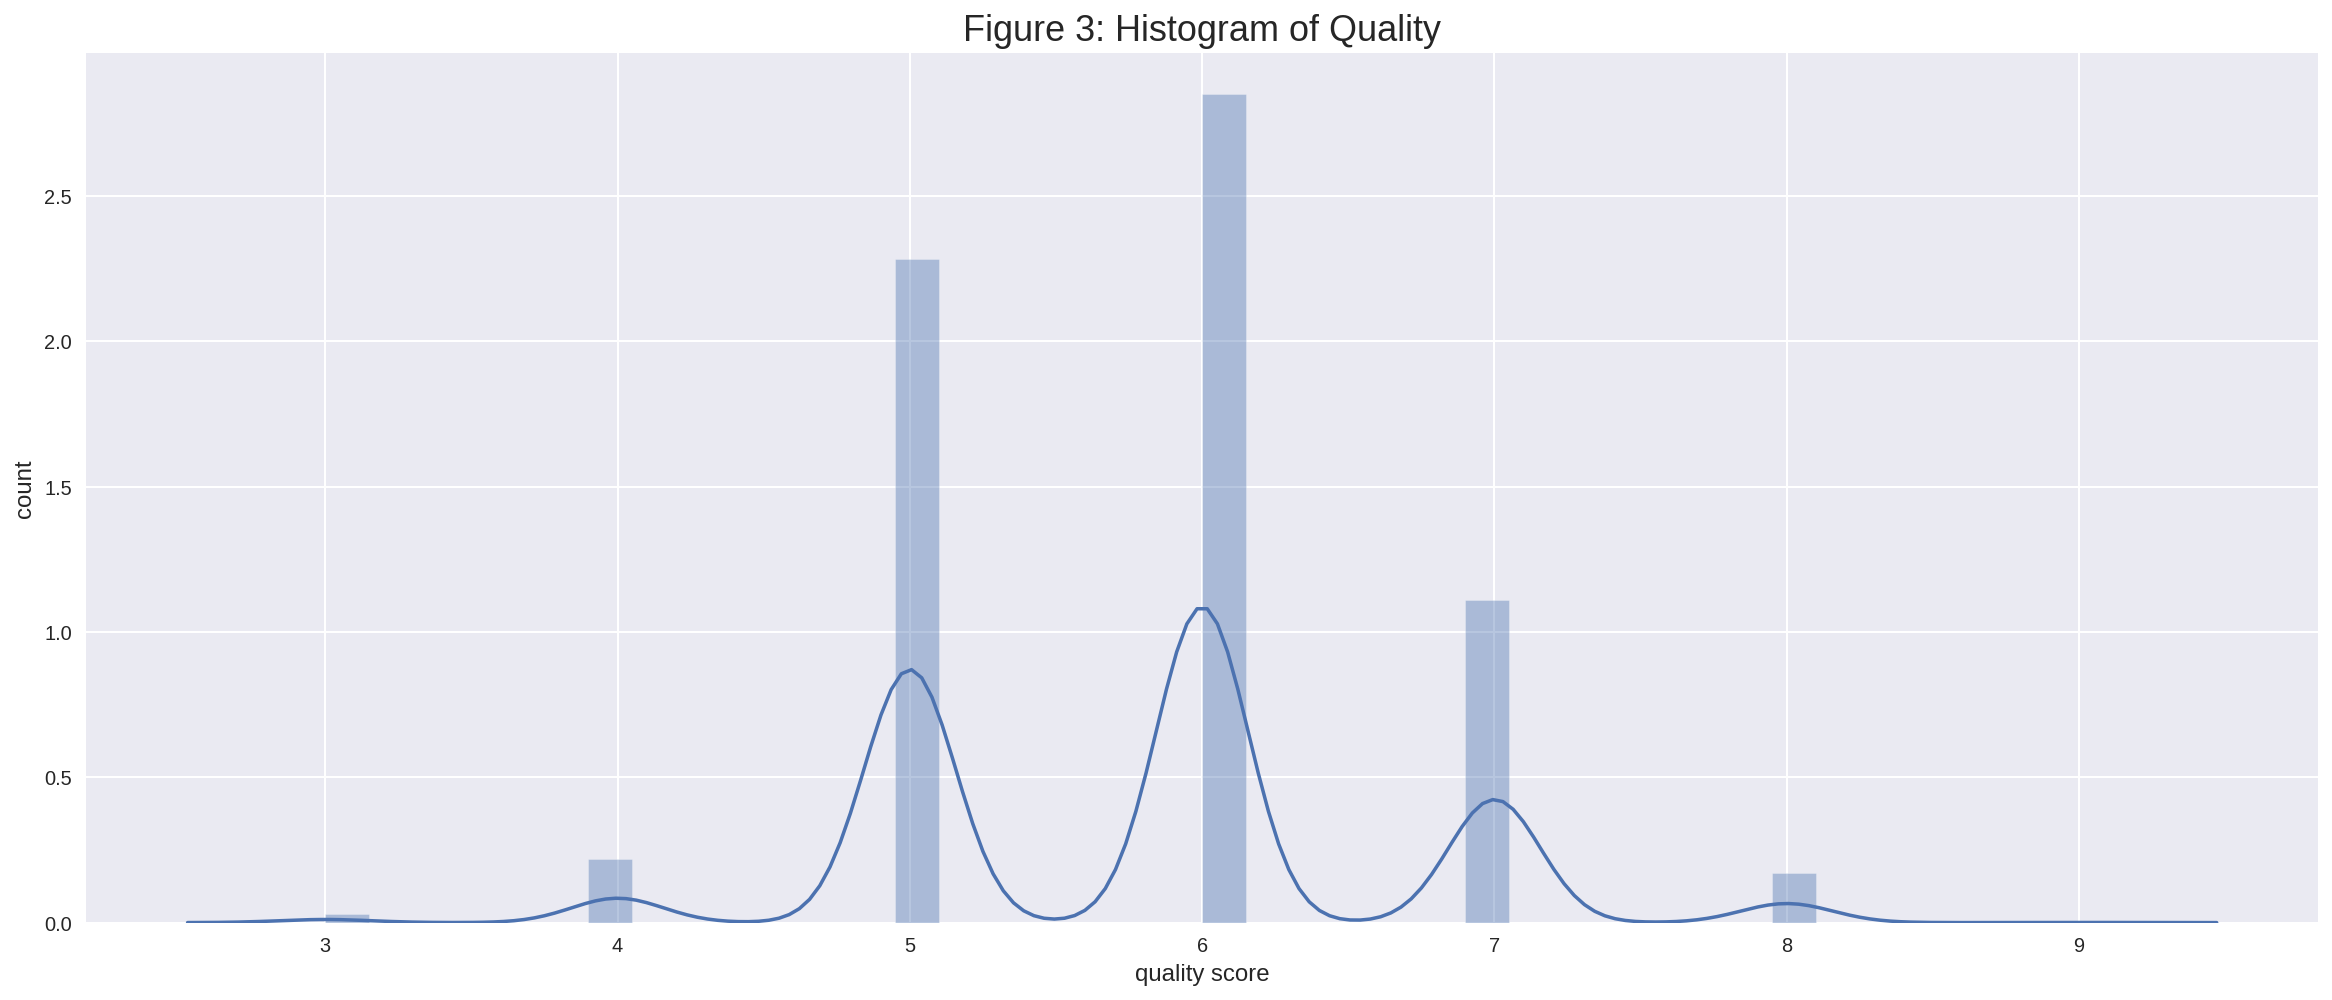

In [ ]:
plt.figure(figsize = (20,8))
qu = sns.distplot(df['quality'], kde=True, bins=40)
qu.set_title('Figure 3: Histogram of Quality', fontsize = 18)
plt.ylabel('count', fontsize = 12)
plt.xlabel('quality score', fontsize = 12)
plt.show()

**Histogram of residual sugar in both White and Red wine**

In this graph, it shows the graph is right skewed and a majority of wine have low to minimal residual sugar. The mean for residual sugar is
5.44 while the median is 3.0.

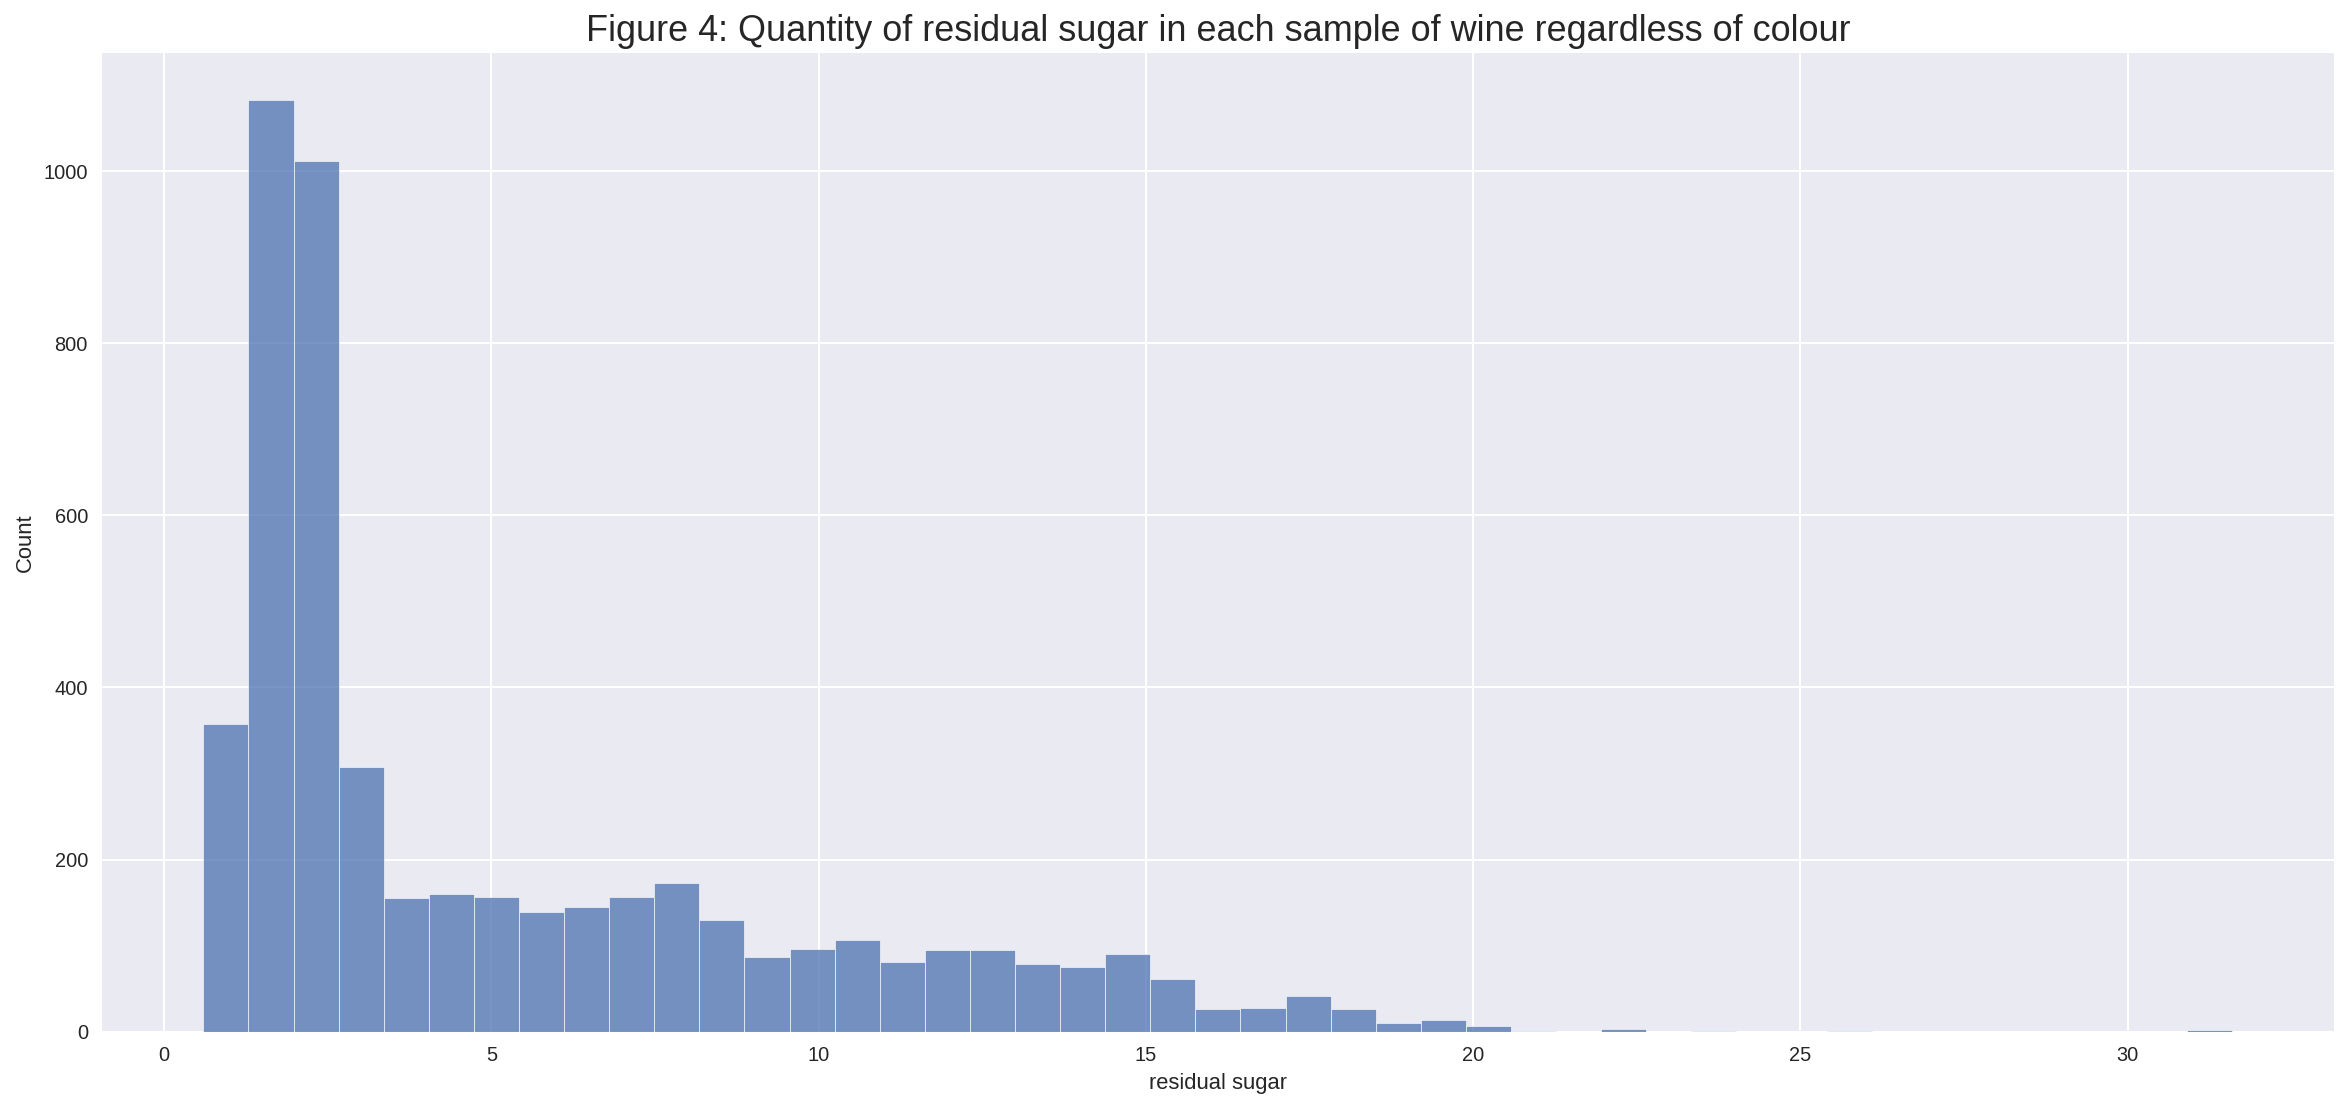

In [ ]:
plt.figure(figsize = (20,9))
ak = sns.histplot(data = df["residual sugar"])
ak = plt.title('Figure 4: Quantity of residual sugar in each sample of wine regardless of colour', fontsize = 18)
plt.show()

**Plot of Volatile Acidity**

From figure 5, we can observe that there are more wines that have volatile acidity.

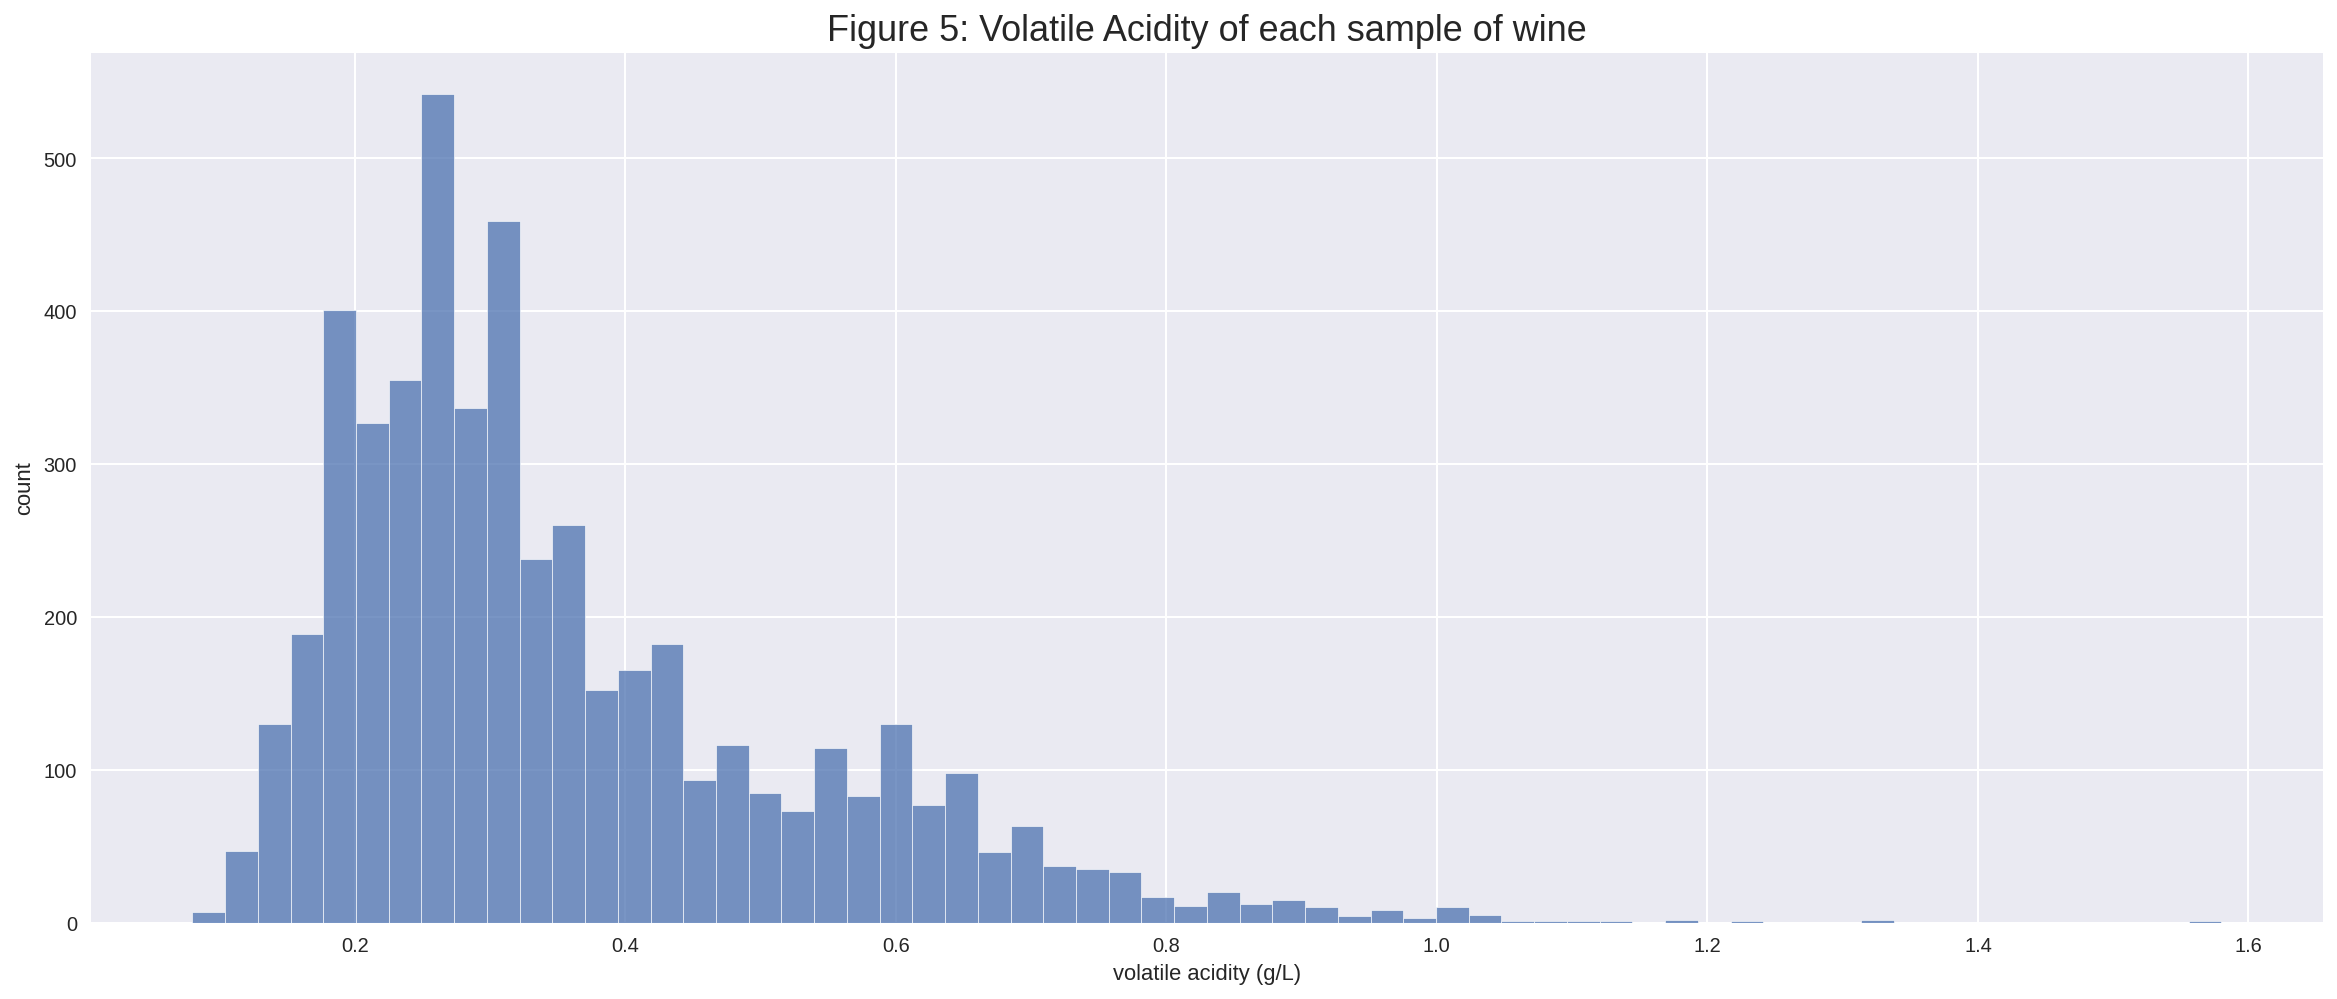

In [ ]:
plt.figure(figsize=(20,8))
sns.histplot(df['volatile acidity'])
plt.title('Figure 5: Volatile Acidity of each sample of wine', fontsize=18)
plt.ylabel('count')
plt.xlabel('volatile acidity (g/L)')
plt.show()

**Histogram of alcohol percentage in red and white wines**

From figure 6, the wine percentage is unbalance and left leaning, explaining that a majority of wine has a lower alcohol percentage.

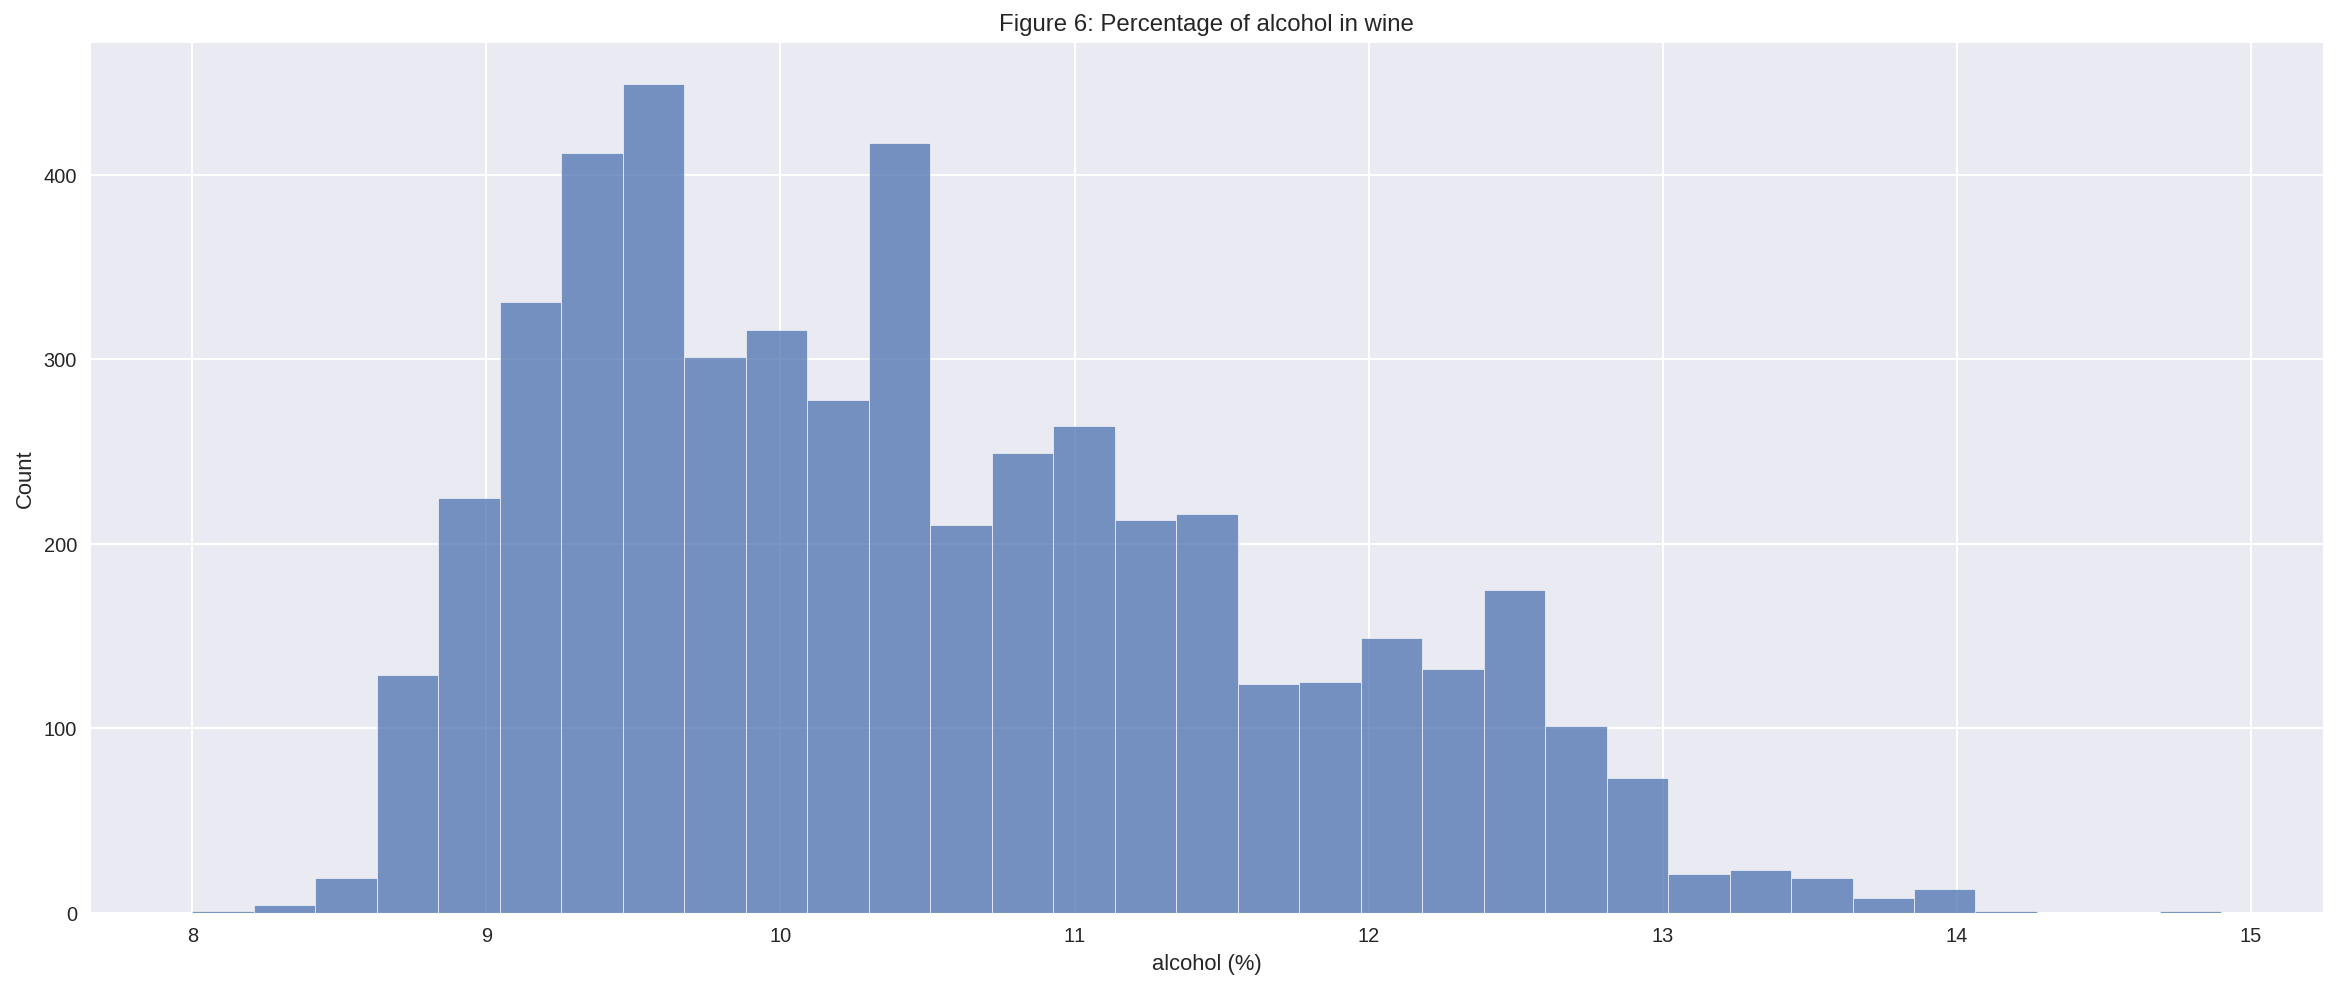

In [ ]:
plt.figure(figsize=(20,8))
sns.histplot(df['alcohol'])
plt.title('Figure 6: Percentage of alcohol in wine')
plt.xlabel('alcohol (%)')
plt.show()

### Biariate Visualisation

**Scatterplot of Fixed Acidity and pH**

Overall the trend in the scatterplot shows that the higher the fixed acidity the lower the pH. Although most of the samples seem to be concentrated at a certain pH range regardless of the amount of fixed acidity, so the conclusion would be that it is a loose trend.

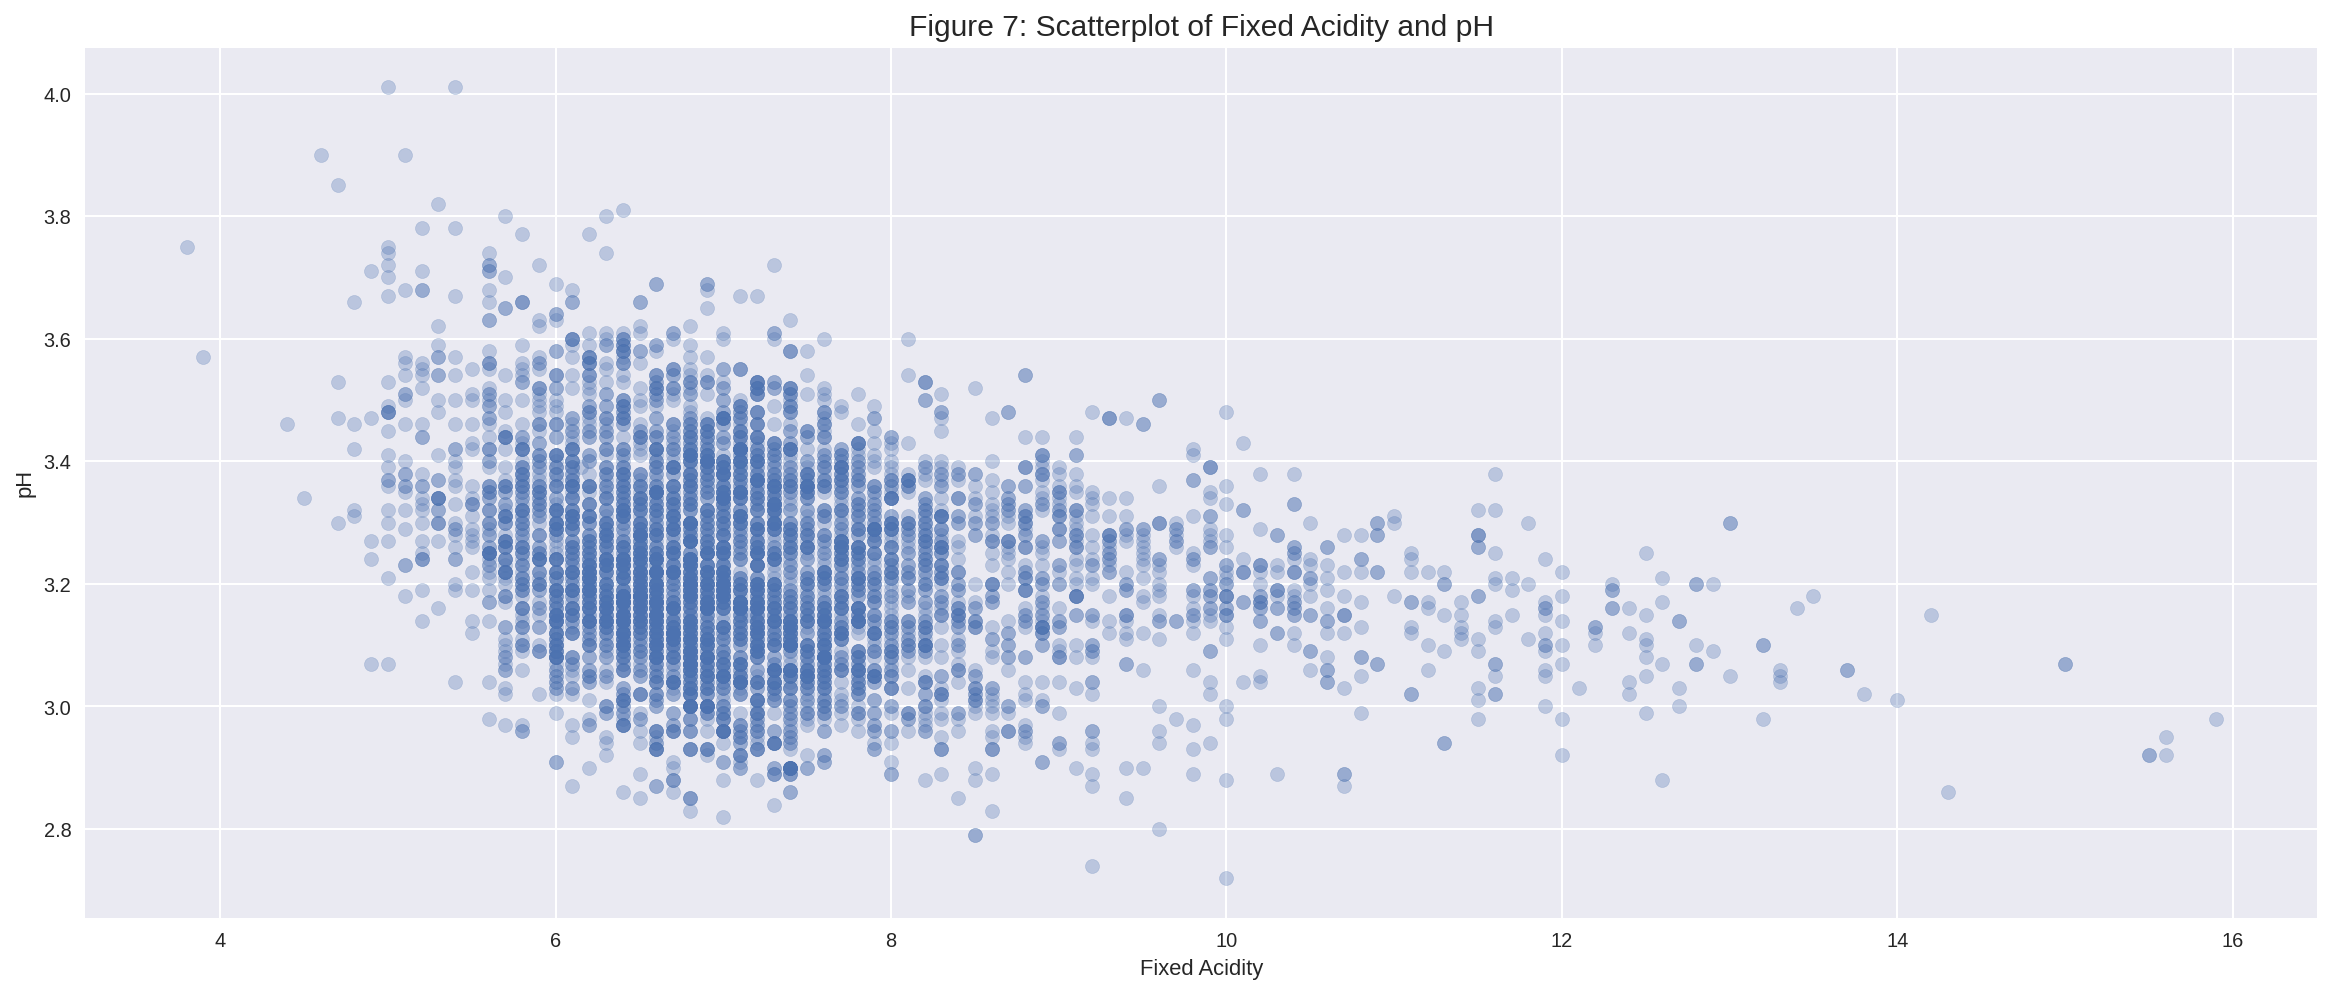

In [ ]:
plt.figure(figsize = (20,8))
plt.scatter(df['fixed acidity'], df['pH'], alpha = 0.3)
plt.title('Figure 7: Scatterplot of Fixed Acidity and pH', fontsize = 15)
plt.xlabel('Fixed Acidity')
plt.ylabel('pH')
plt.show();

**Line graph of Free Sulfur Dioxide compared to the Total Sulfur Dioxide in Red and White Wine**

As a whole it can be observed that free sulfur dioxide makes up a significant amount of the total sulfur dioxide. The mean for the free sulfur dioxide is 30.53 while the mean for the total sulfur dioxide is 115.74, this would indicate that one would expect around 26% of the total sulfur dioxide in a random sample of wine to be free sulfur dioxide.

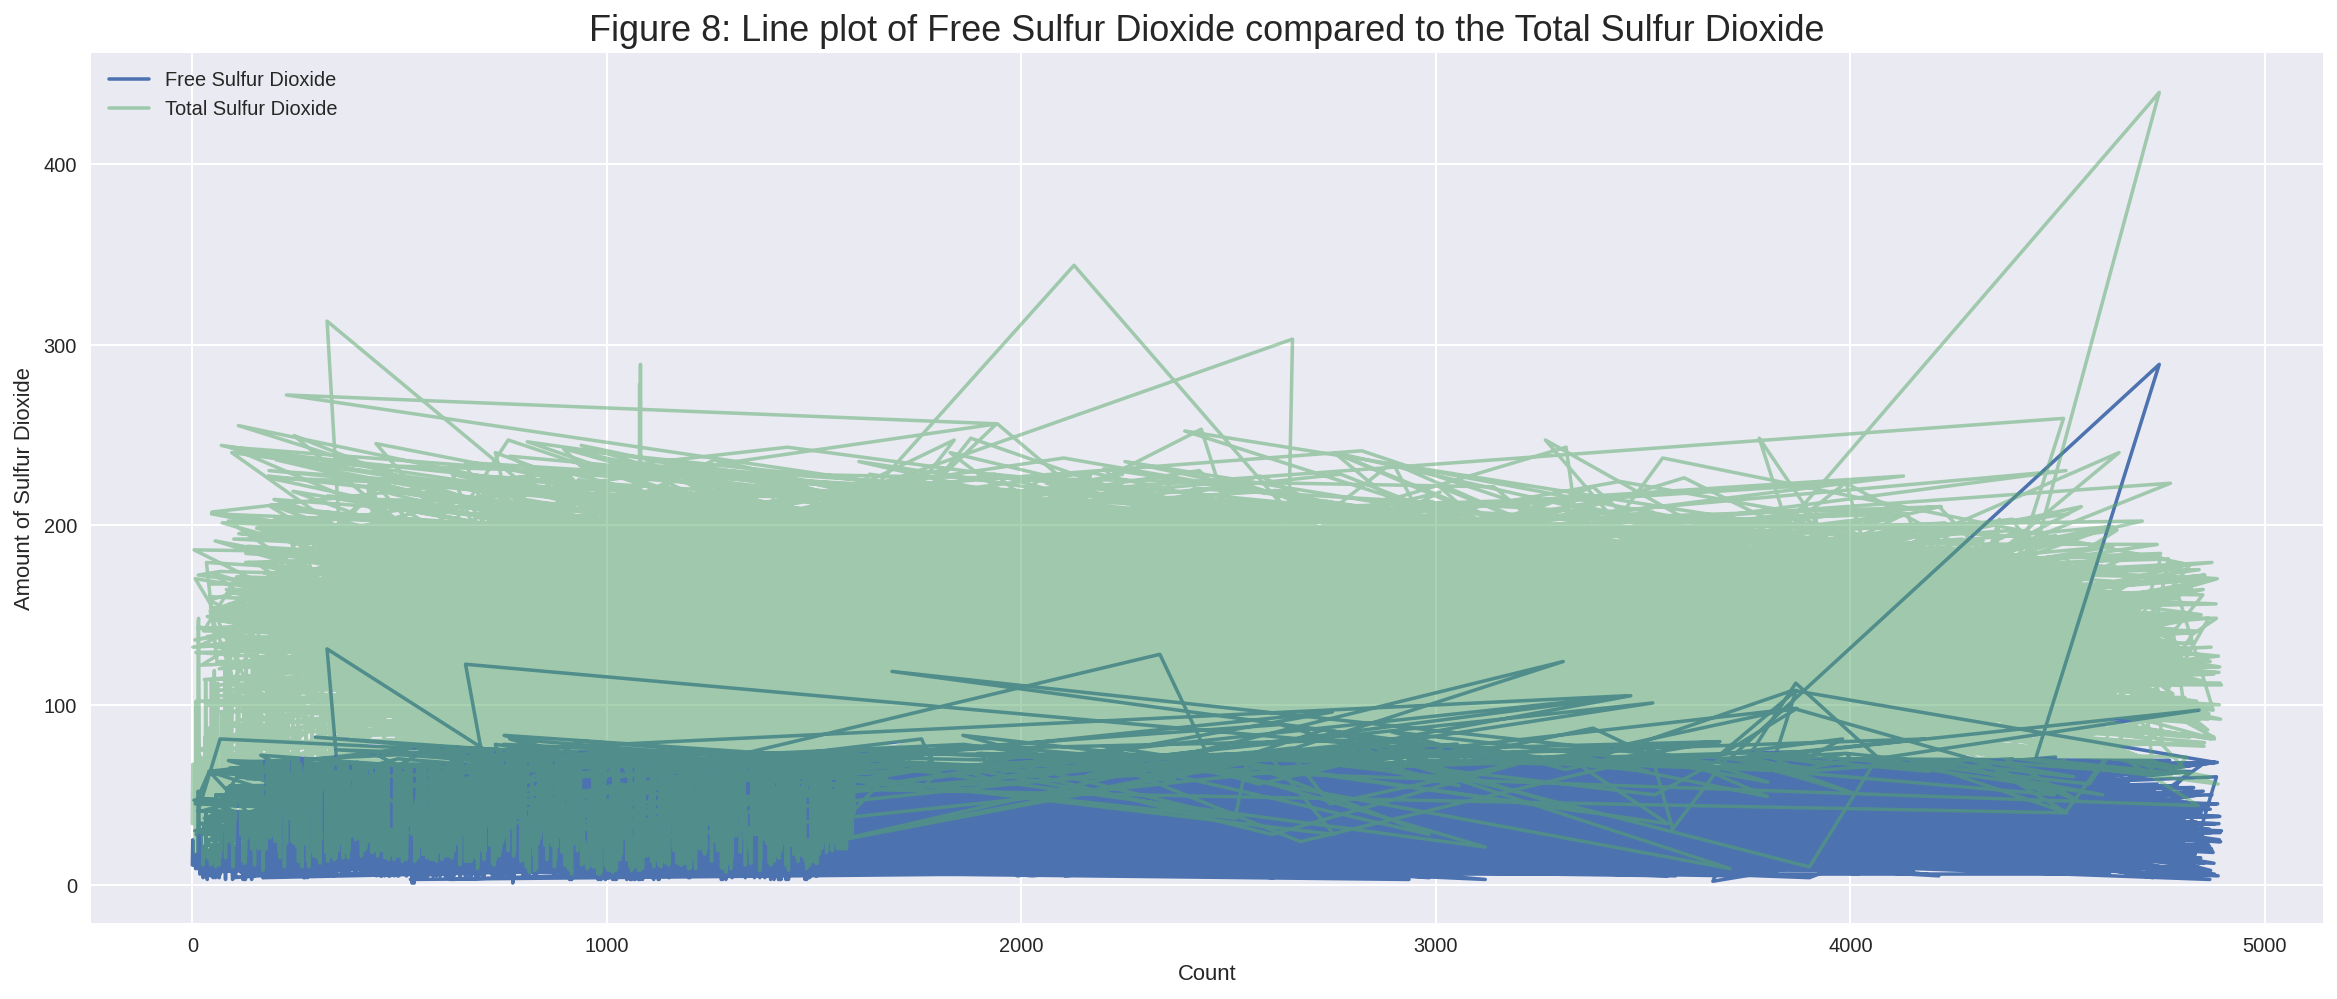

In [ ]:
plt.figure(figsize = (20,8))
plt.plot(list(df['free sulfur dioxide'].index.values), df['free sulfur dioxide'], label = "Free Sulfur Dioxide")
plt.plot(list(df['total sulfur dioxide'].index.values), df['total sulfur dioxide'], label = "Total Sulfur Dioxide", alpha=0.5)
plt.title('Figure 8: Line plot of Free Sulfur Dioxide compared to the Total Sulfur Dioxide', fontsize = 18)
plt.xlabel('Count')
plt.ylabel('Amount of Sulfur Dioxide')
plt.legend()
plt.show();

**BOXPLOT OF alcohol BY wine TYPE**

From figure 9, we can see that alcohol percentage does not differ from wine types.

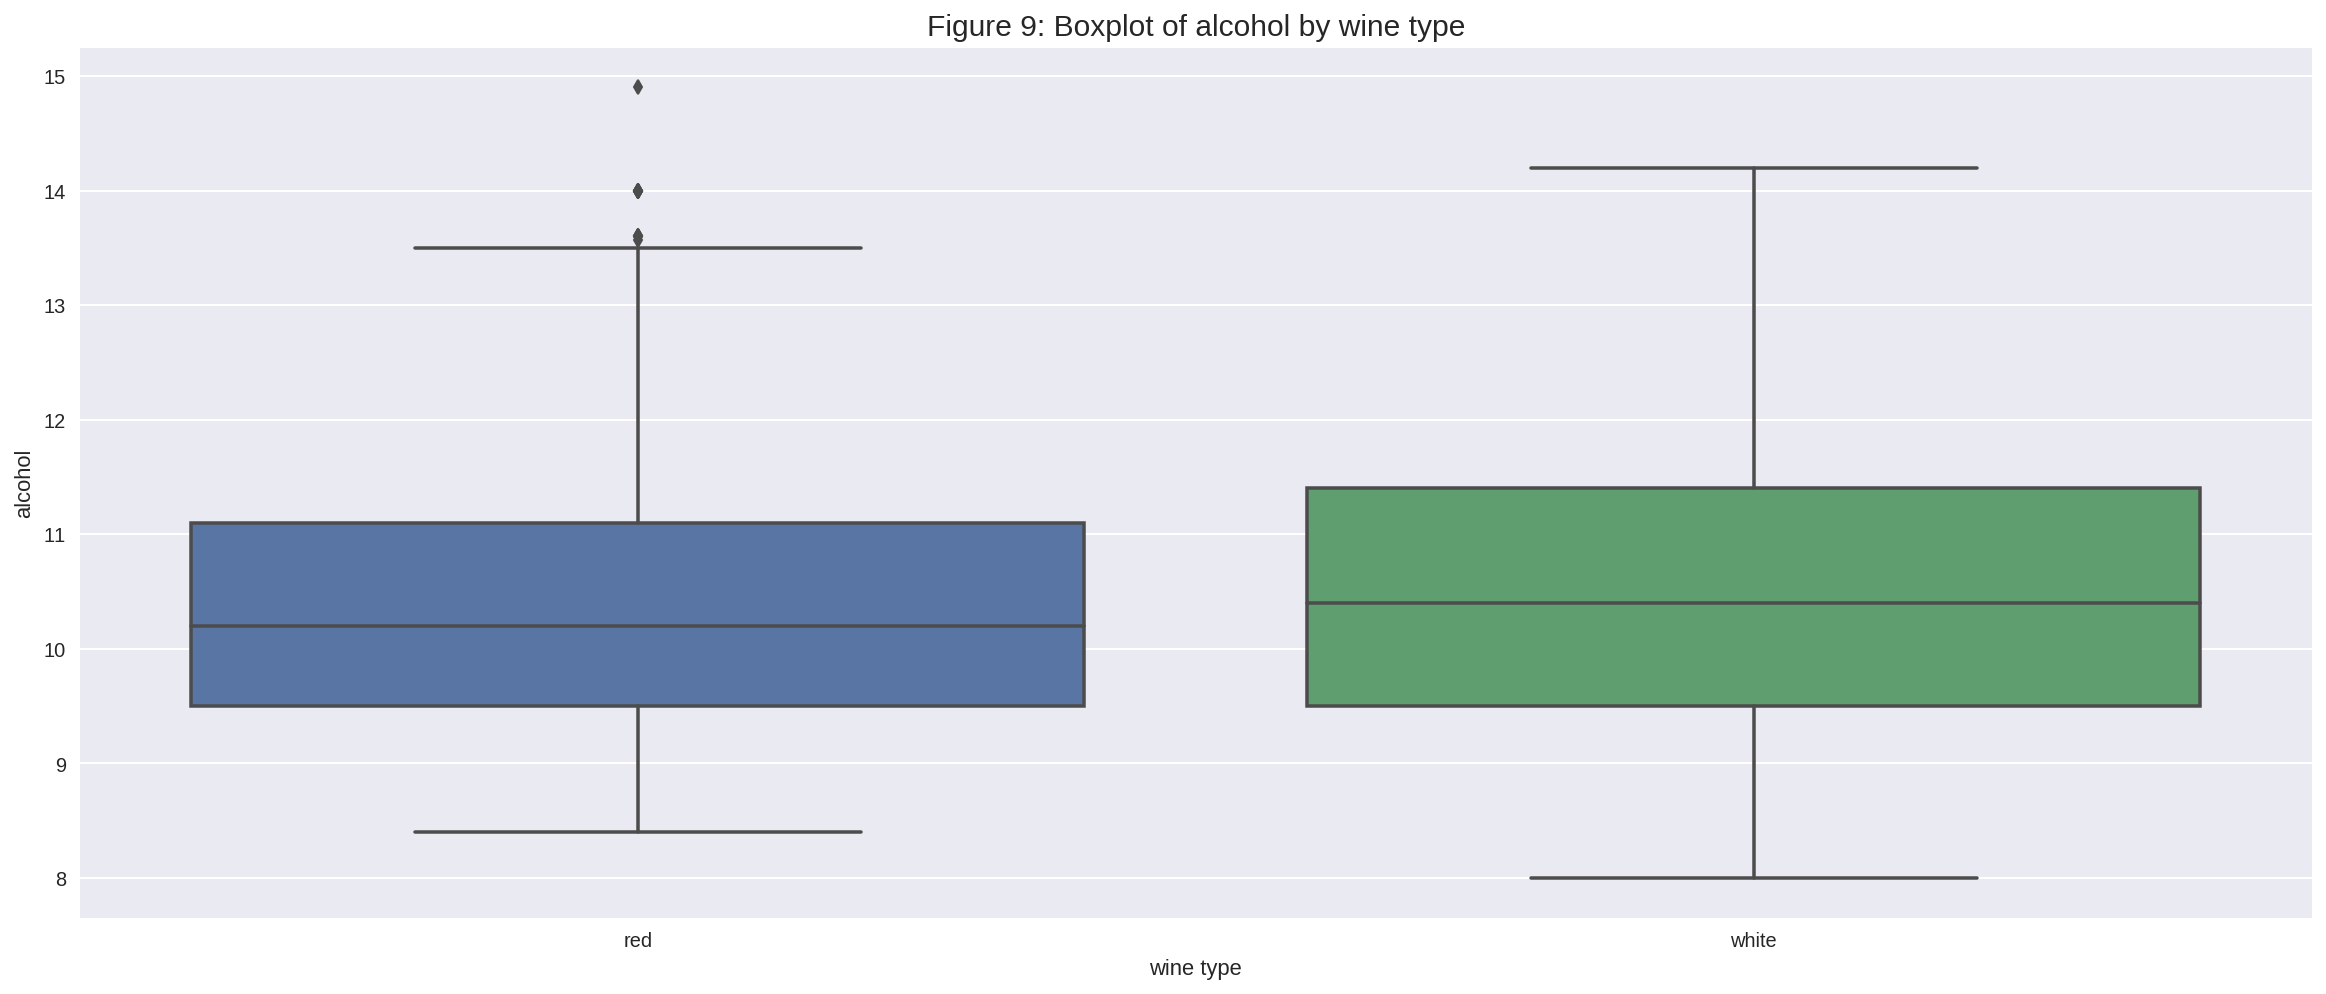

In [ ]:
plt.figure(figsize = (20,8))
b = sns.boxplot(df['wine type'], df['alcohol']);
b = plt.title('Figure 9: Boxplot of alcohol by wine type', fontsize = 15)
plt.show();

**Scatterplot of Citric acid and pH**

From the figure below, as the amount of citric acid is added into the wine, the pH level shows the wine becoming more acidic.

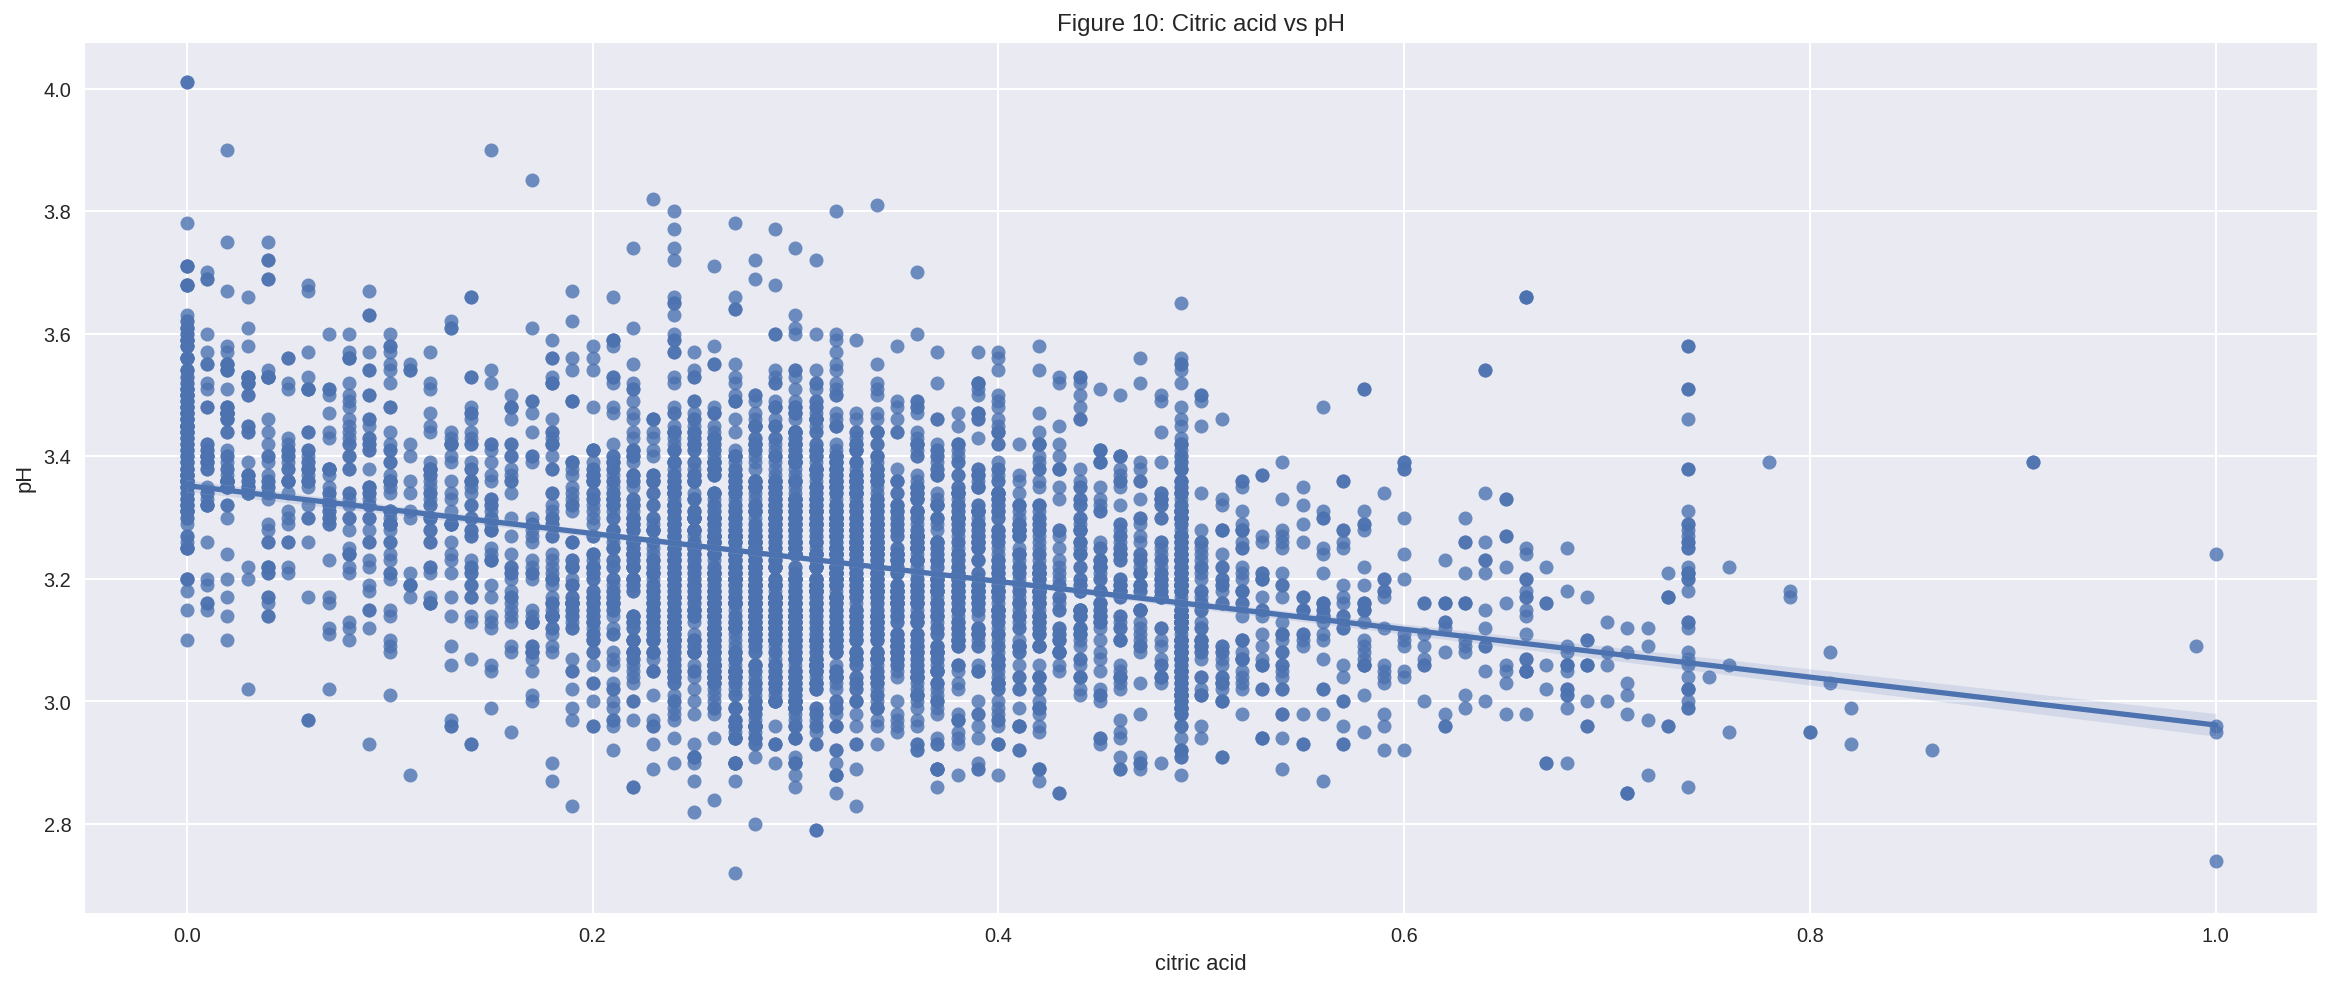

In [ ]:
plt.figure(figsize=(20,8))
sns.regplot(x=df['citric acid'], y=df['pH'])
plt.title('Figure 10: Citric acid vs pH')
plt.show()

**Boxplot of quality and residual sugar**


In this Boxplot, it has illustrated the amount of residual sugar smaller ,it will have better quality.

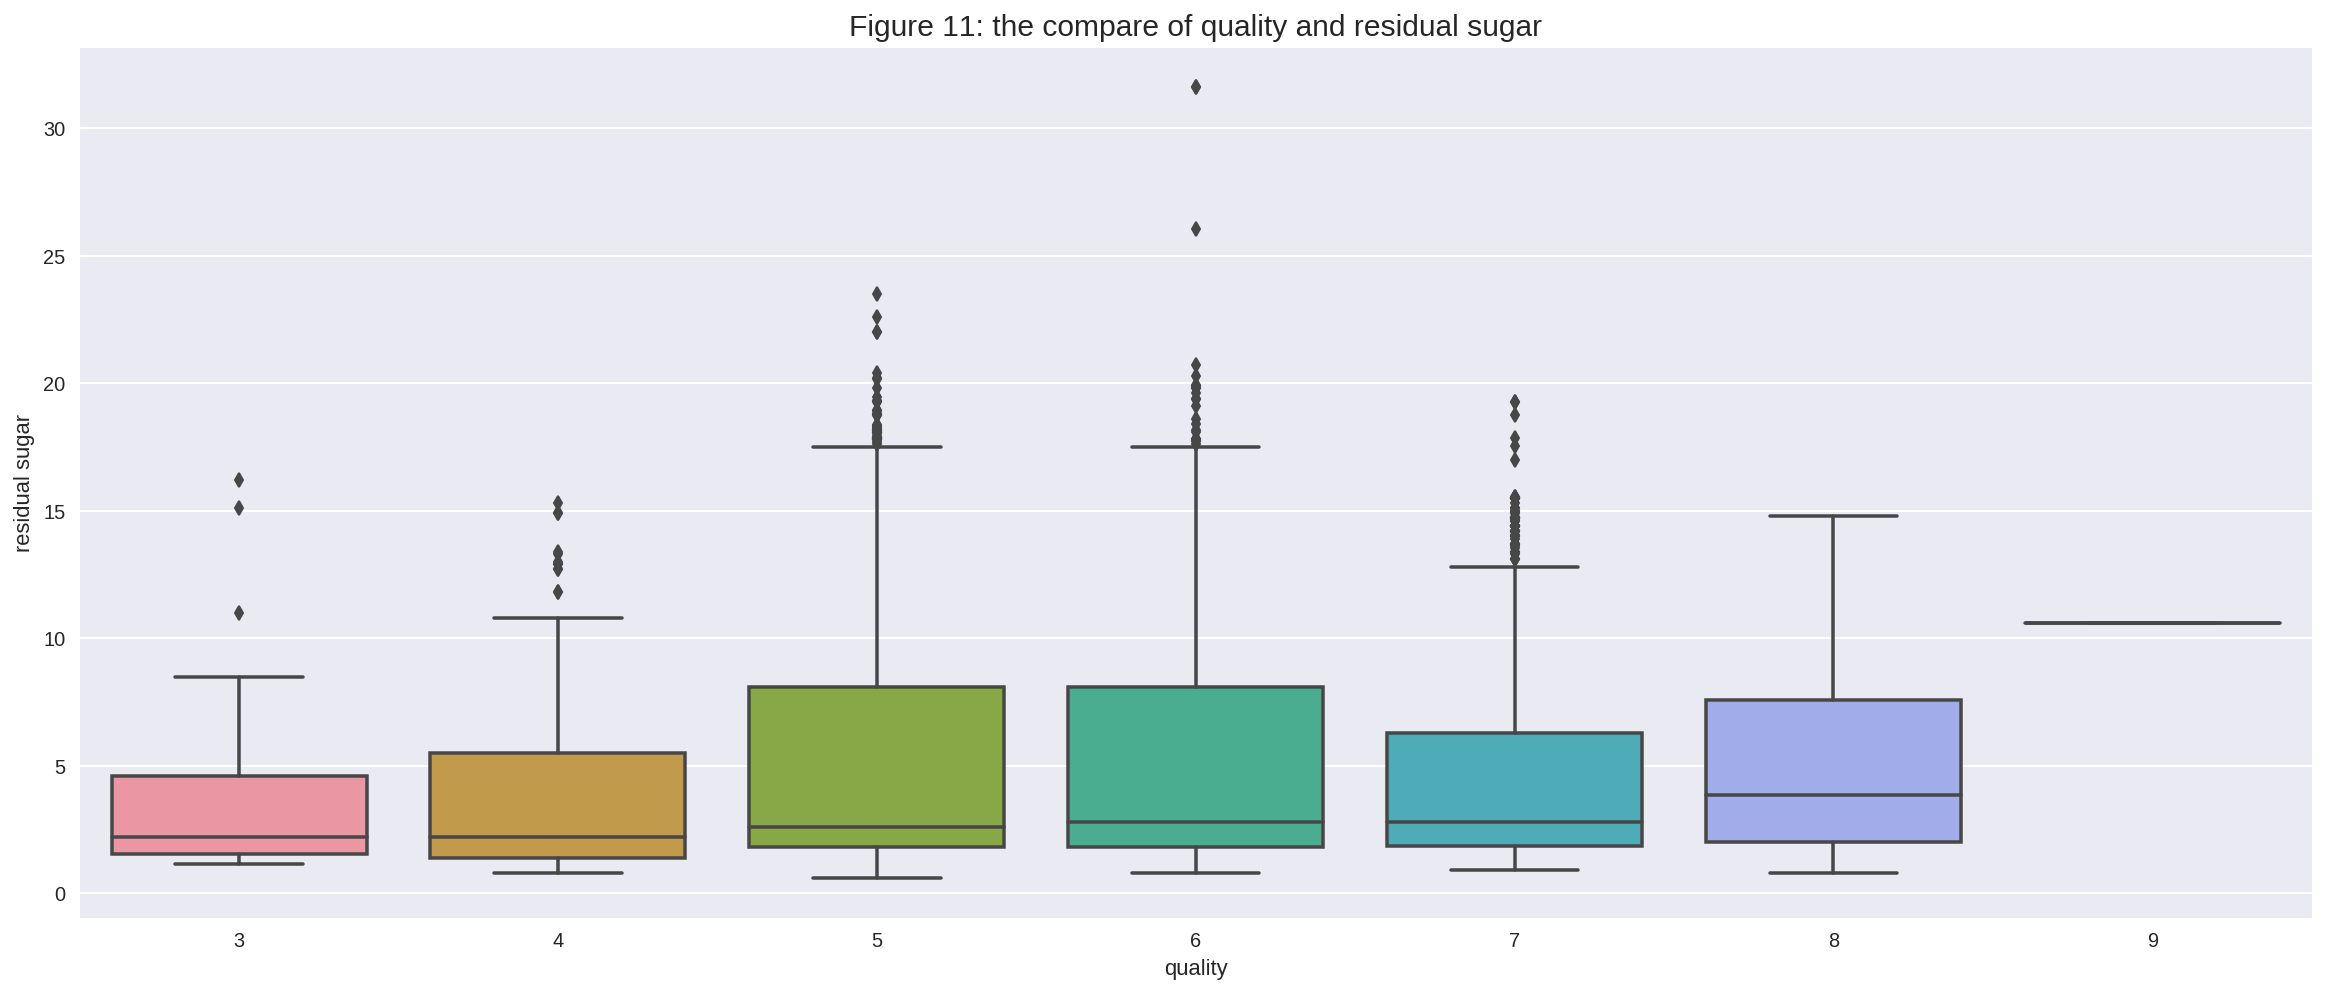

In [264]:
plt.figure(figsize = (20,8))
sns.boxplot(df['quality'], df['residual sugar']);
plt.title('Figure 11: the compare of quality and residual sugar', fontsize = 15)
plt.show()

### Multivariate Visualisation

**Boxplot of Density, Quality and Wine Type**

From figure 12, it shows that red wine has a much lower level in total sulphur dioxide and it is not a predictor in determining wine quality

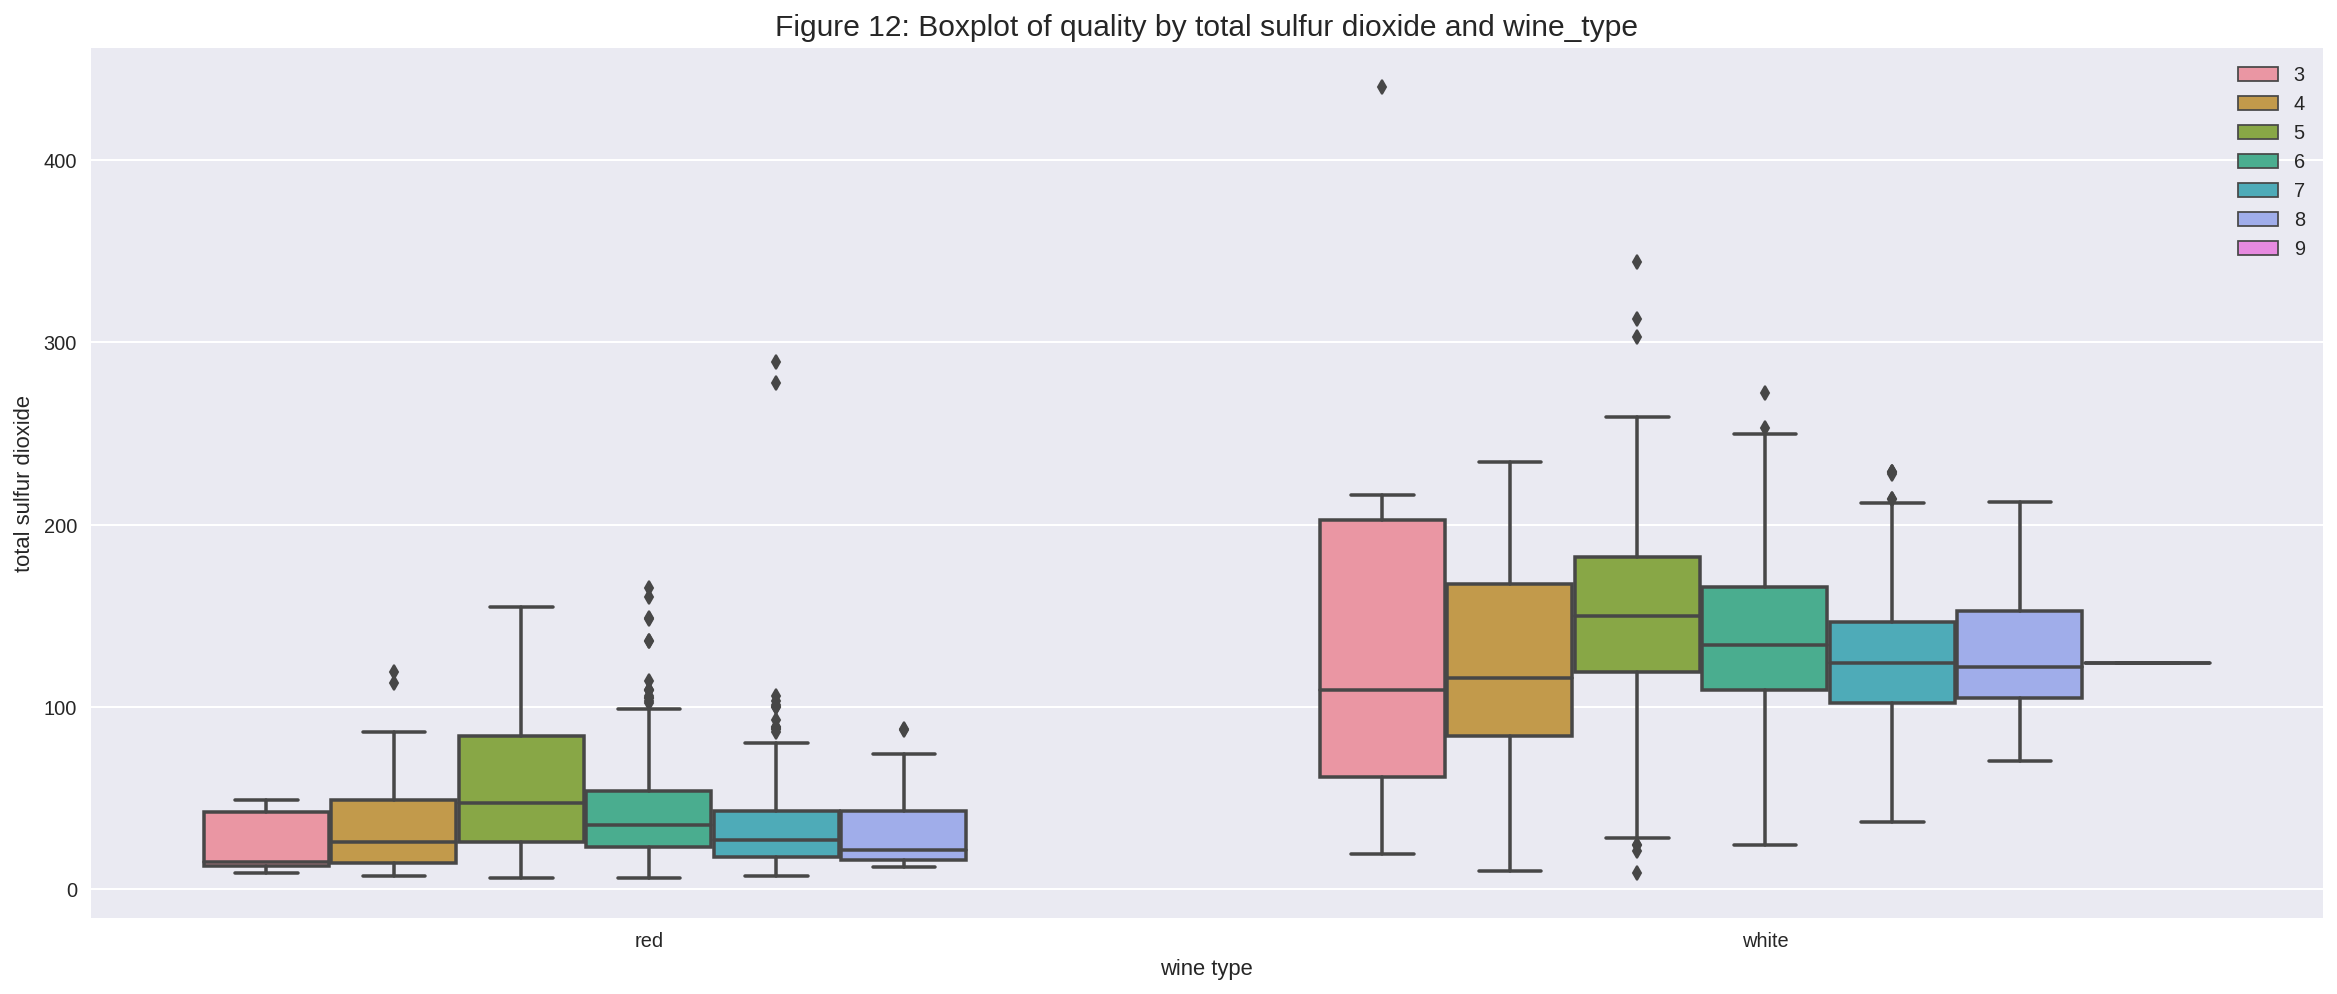

In [273]:
plt.figure(figsize = (20,8))
sns.boxplot(df['wine type'], df['total sulfur dioxide'], hue = df['quality'])
plt.title('Figure 12: Boxplot of quality by total sulfur dioxide and wine_type', fontsize = 15);
plt.legend(loc = 'upper right')
plt.show();

**Scatterplot with regression line of density, alcohol and quality**

From figure 13, we can observe that having lower residual sugar and a higher alcohol percenatge is indicative of a higher scoring wine.

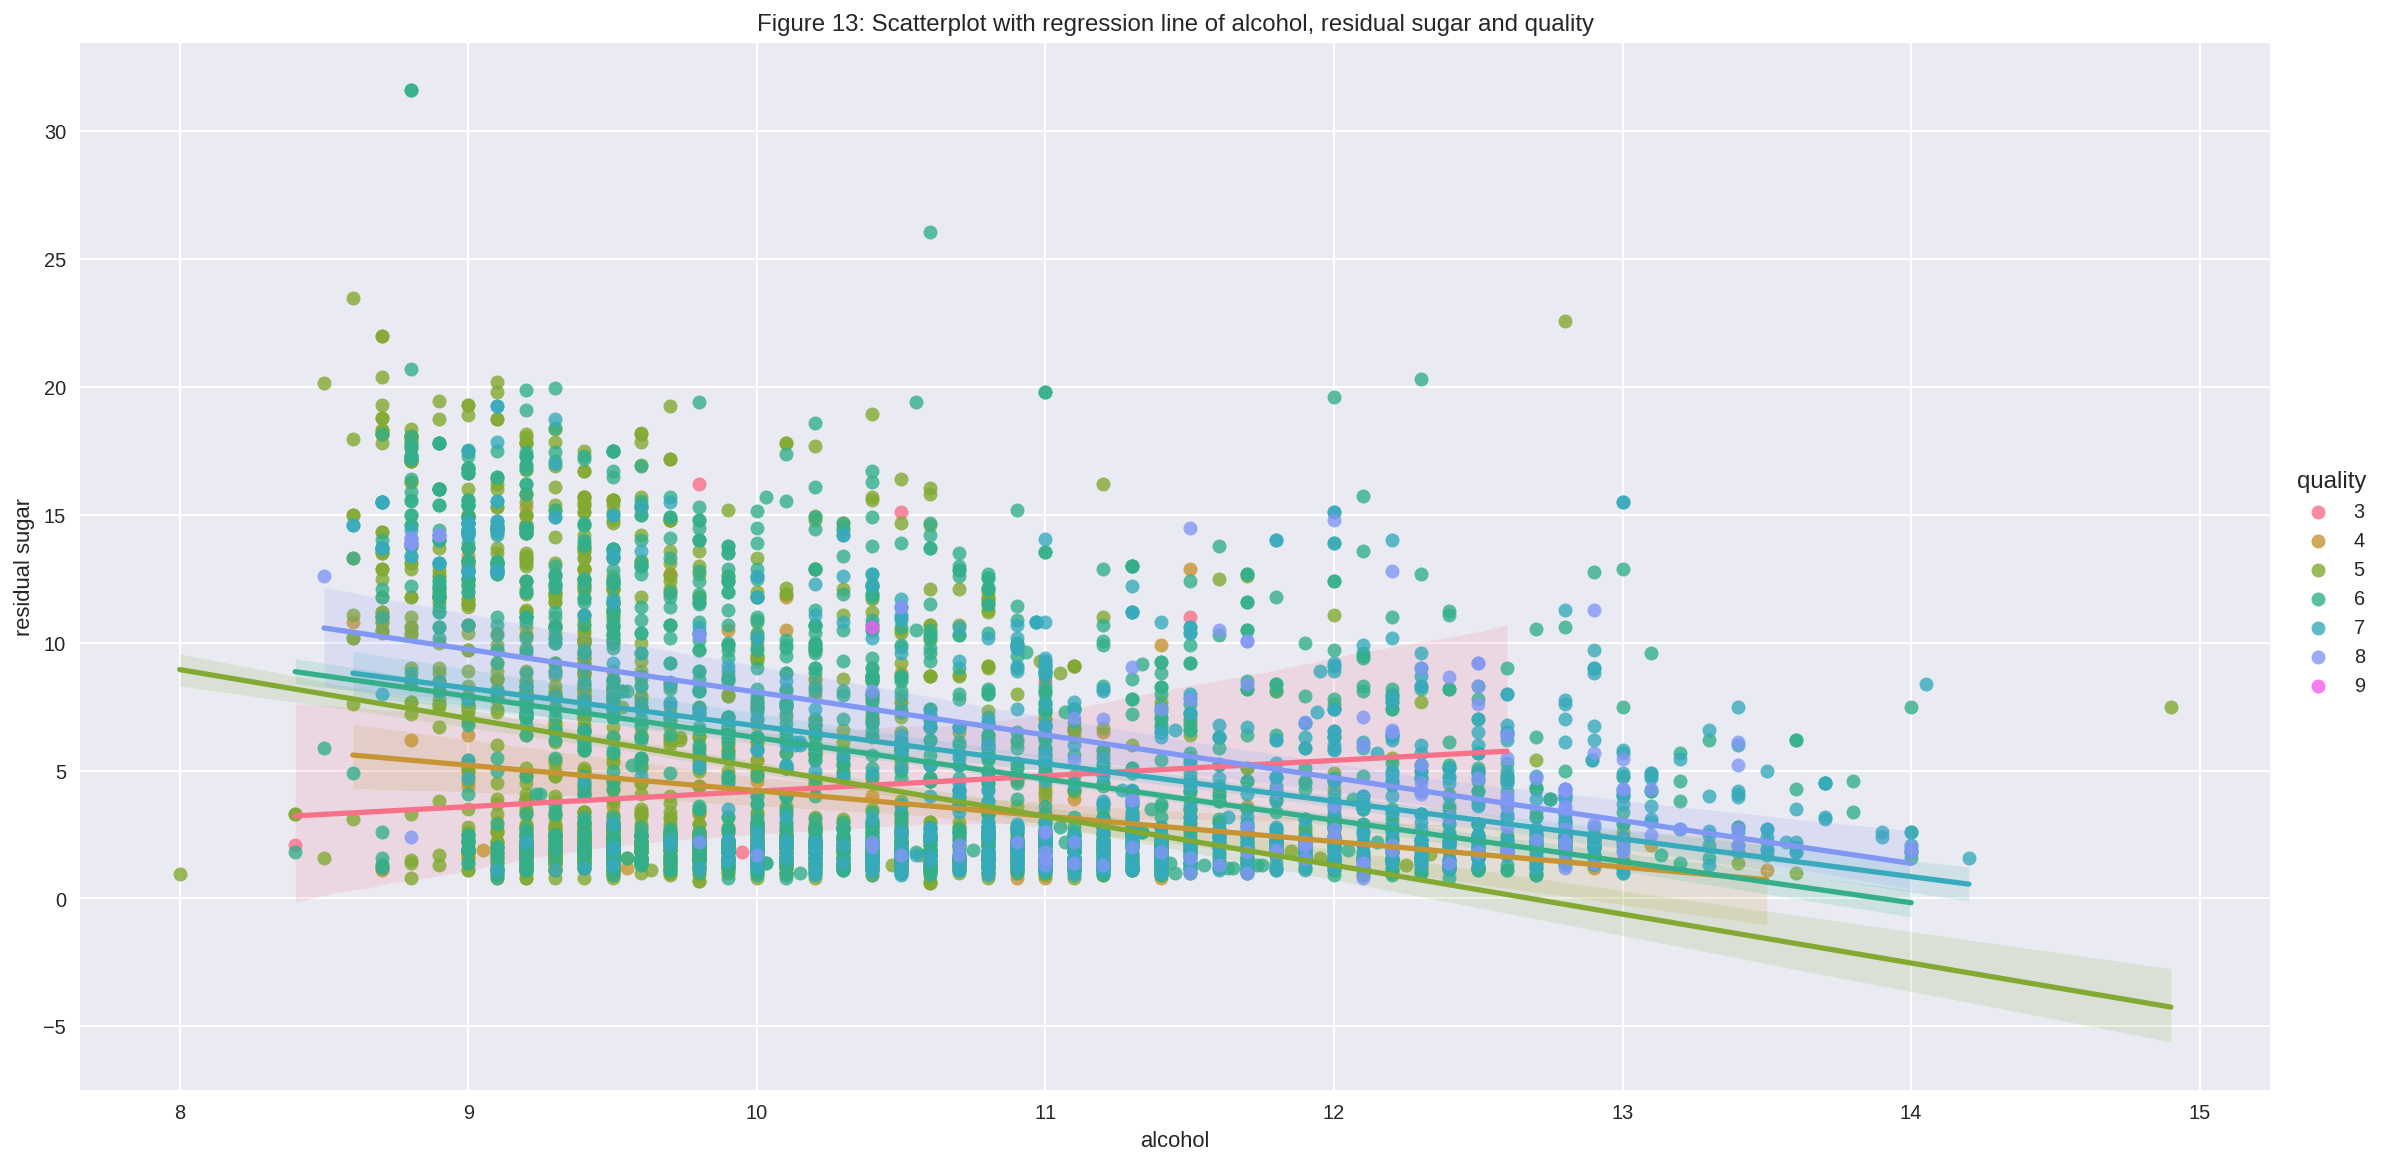

In [ ]:
sns.lmplot(x='alcohol', y='residual sugar',data=df, hue='quality', height=8, aspect=2)
plt.title('Figure 13: Scatterplot with regression line of alcohol, residual sugar and quality')
plt.show()

**SCATTERPLOT OF pH BY citric acid with wine type(rad and white)**

Figure 14 shows that there are not much different between red wine and white wine.

<Figure size 1440x576 with 0 Axes>

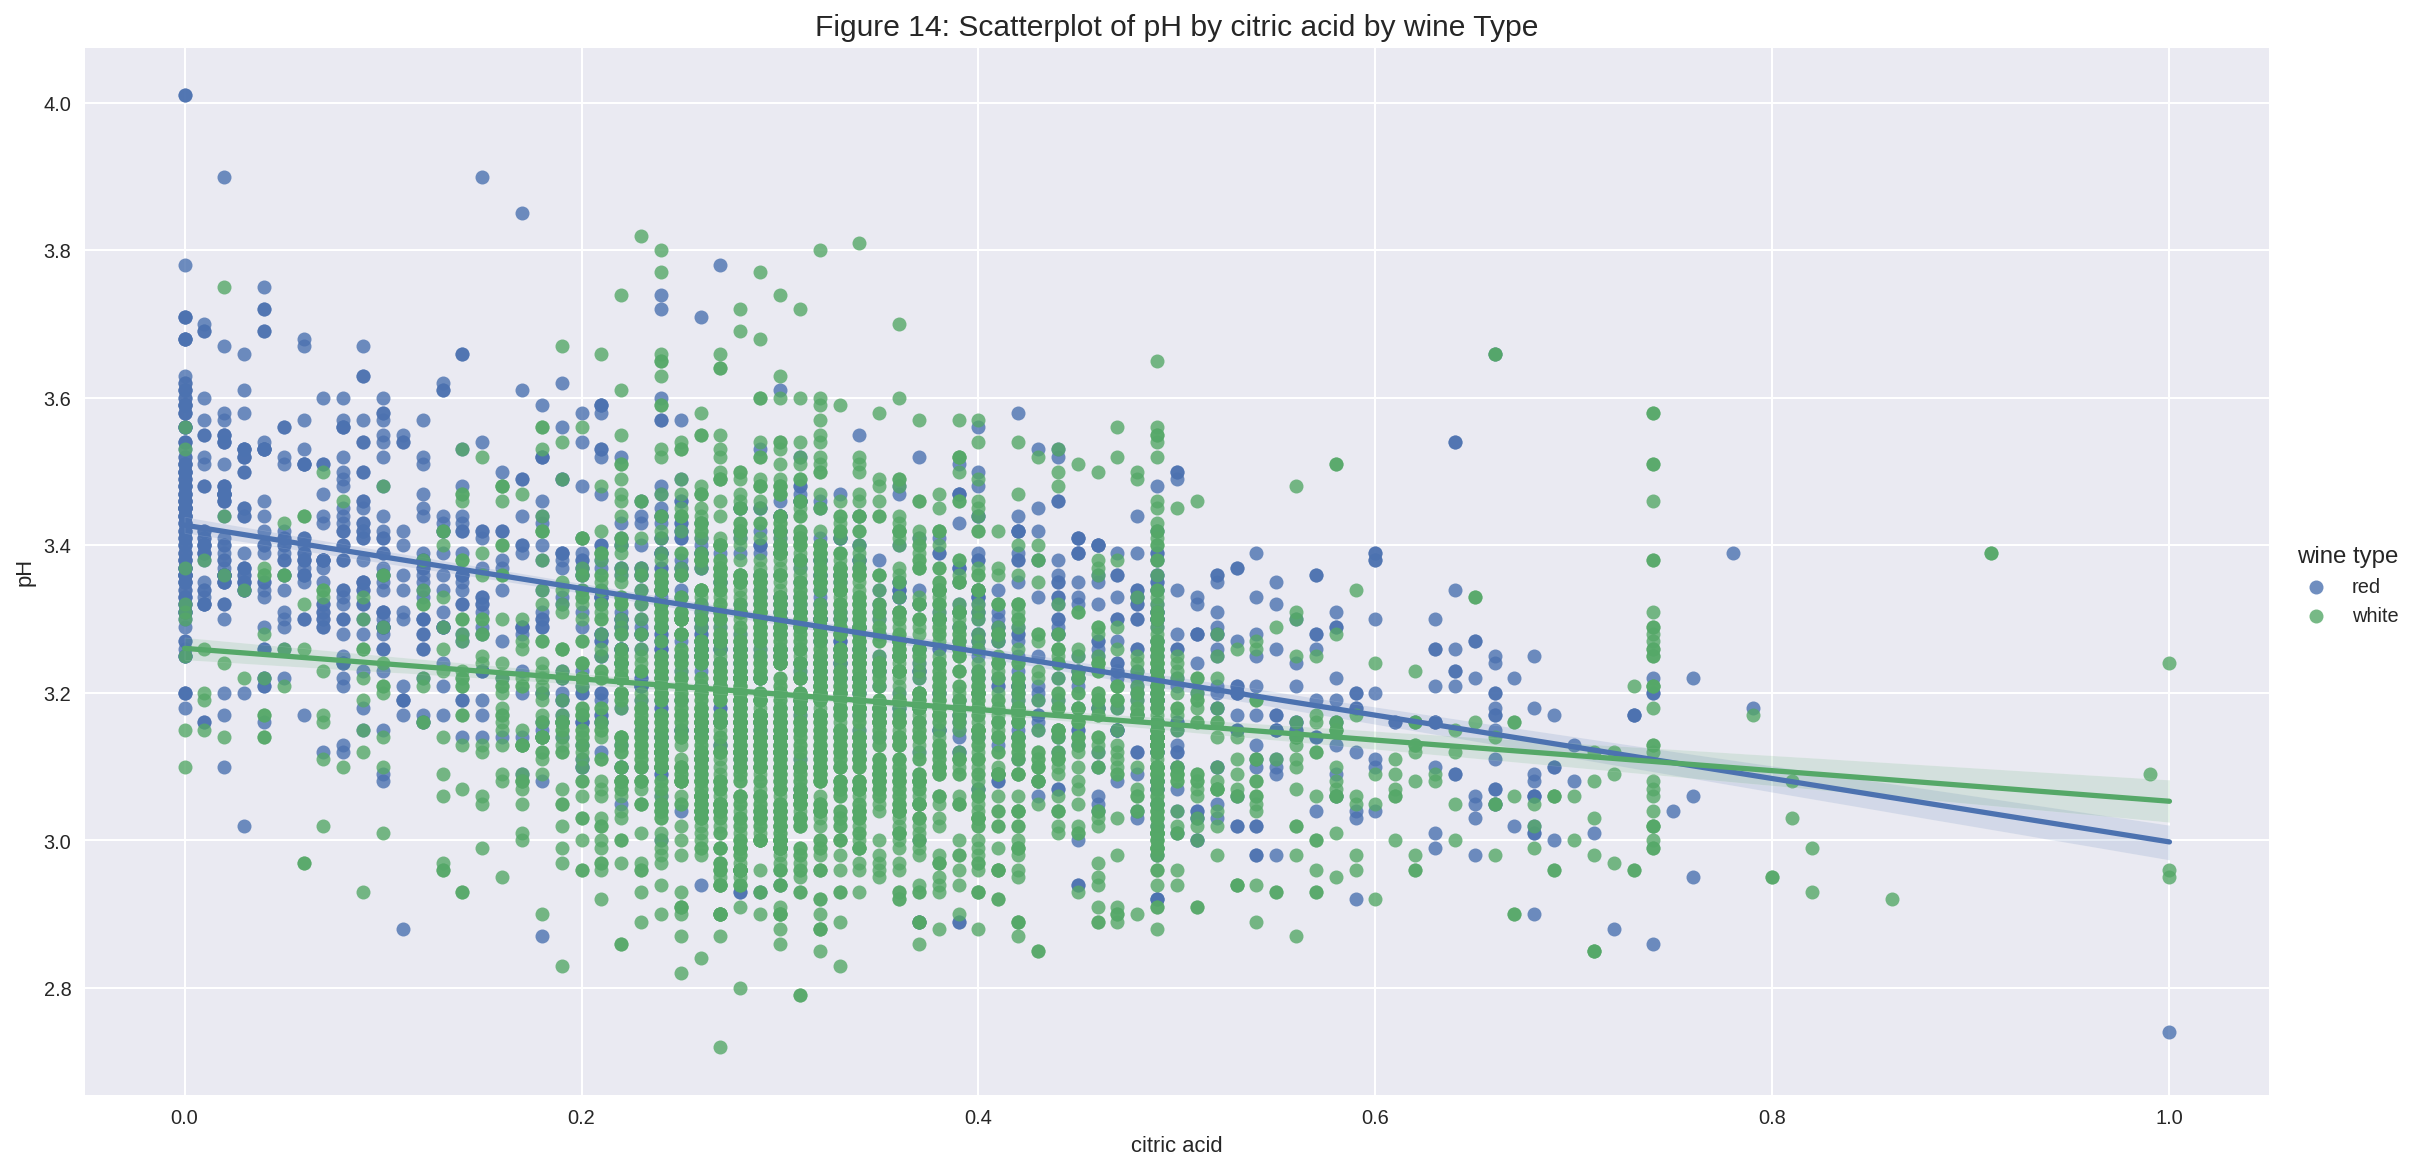

In [274]:
plt.figure(figsize = (20,8))
sns.lmplot(data=df, x='citric acid', y='pH', hue = 'wine type', height=8, aspect=2)
plt.title('Figure 14: Scatterplot of pH by citric acid by wine Type', fontsize = 15);
plt.show();

**Boxplot of quality by free sulfur dioxide and wine_type**

From figure 15, it has shows that the less free sulfur dioxide,the wine quality will be better.

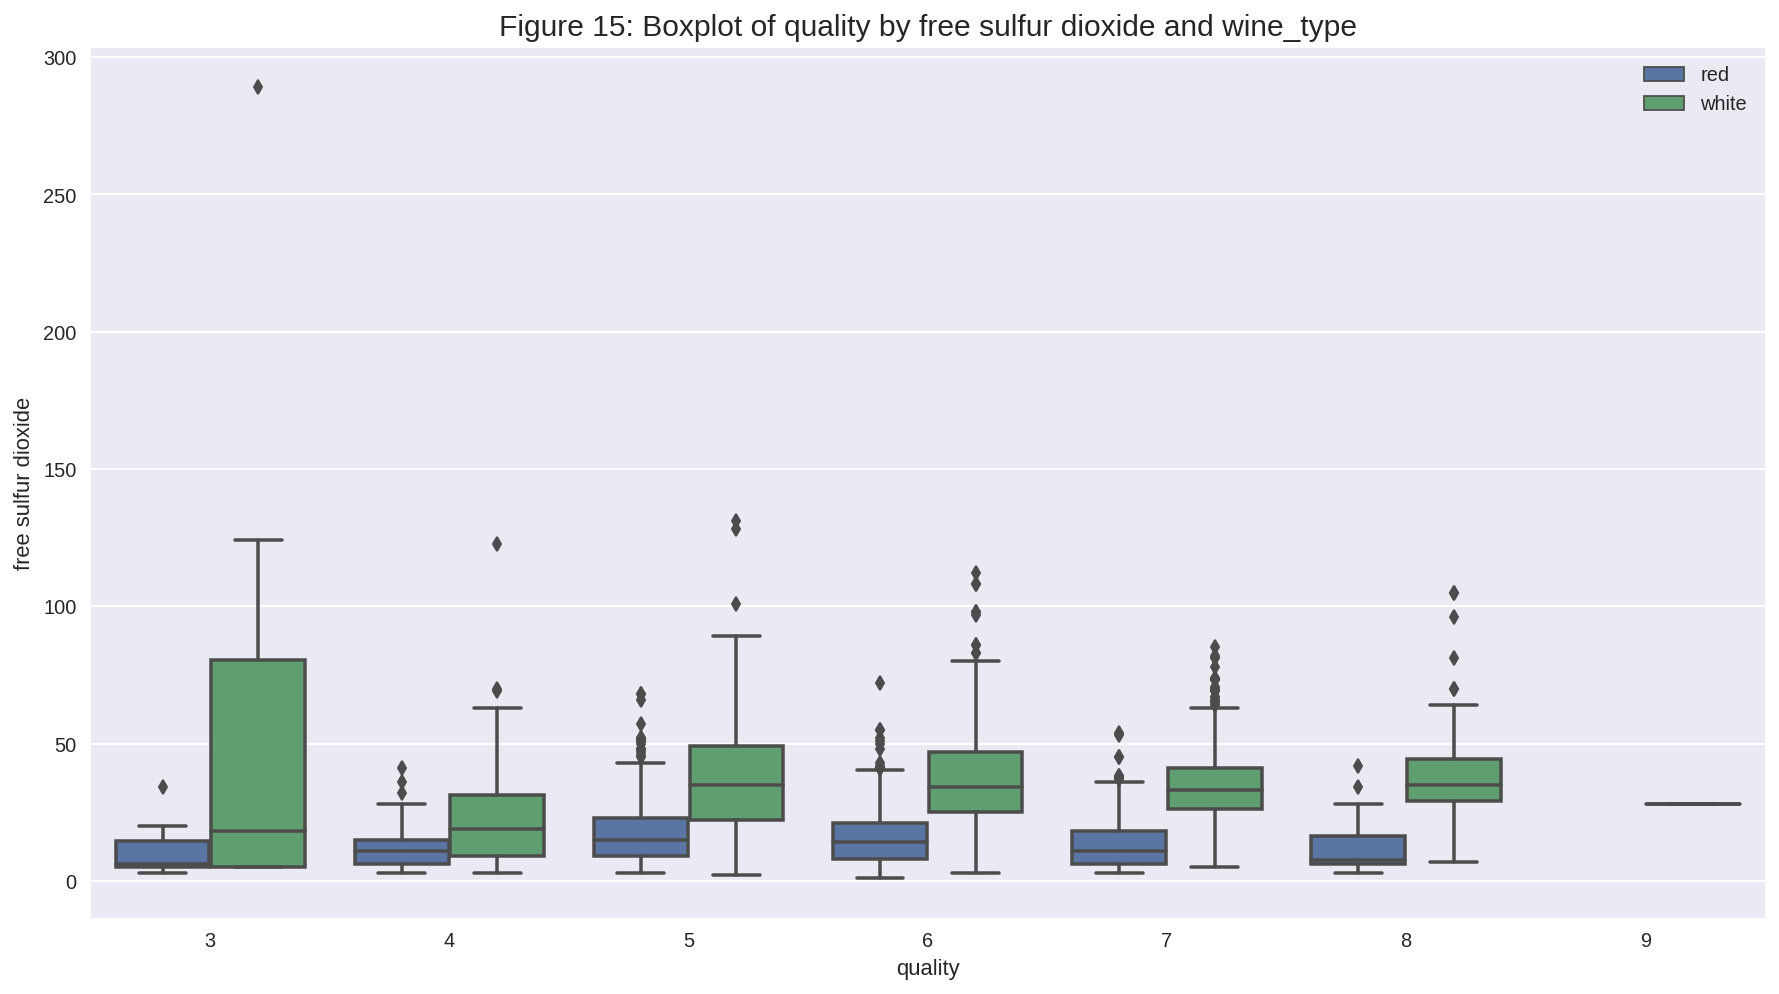

In [275]:
plt.figure(figsize = (15,8))
sns.boxplot(df['quality'], df['free sulfur dioxide'], hue = df['wine type'])
plt.title('Figure 15: Boxplot of quality by free sulfur dioxide and wine_type', fontsize = 15);
plt.legend(loc = 'upper right')
plt.show();

**Volatile and Fixed in Acidity in Wines:**

In figure 16A, it is identified that there is higher protional of Volotile acidity in Red Wines where is the opposite is true for the White Wines where, there is a higher proption of Fixed acidity to Volatile acidity.





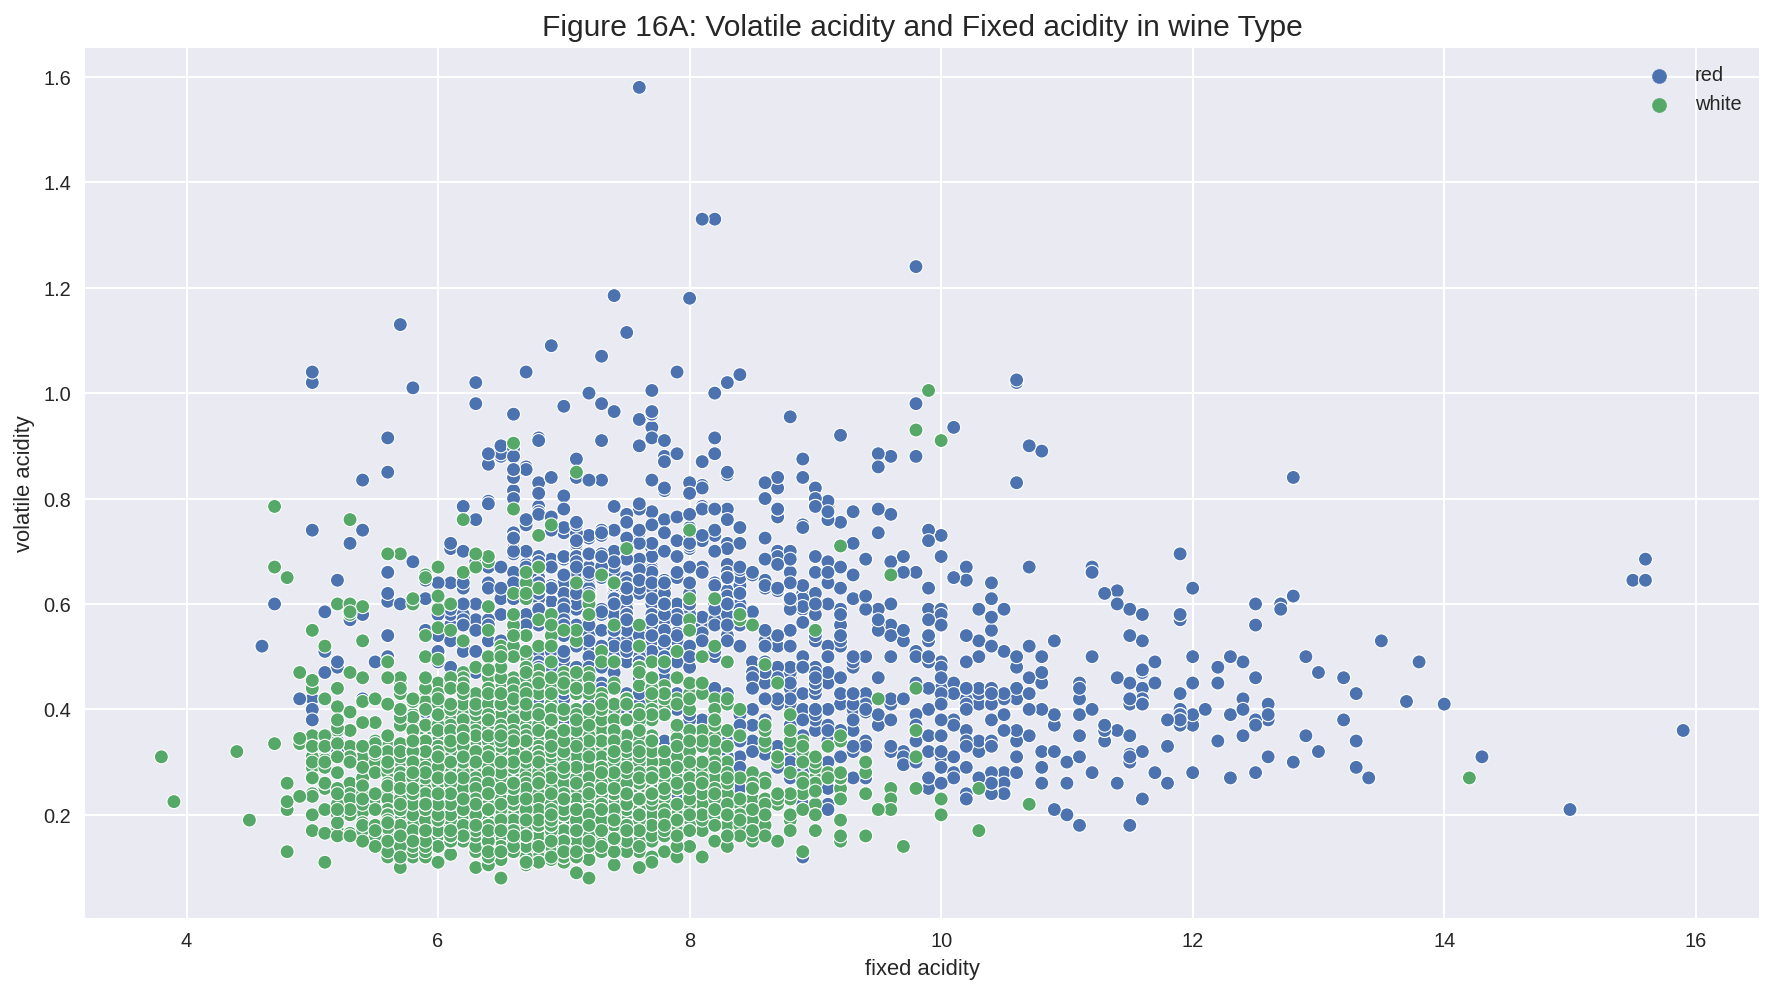

In [277]:
#Volatile Acidicty and Fixed acidity in Wines 
plt.figure(figsize = (15,8))

sns.scatterplot(df["fixed acidity"], df["volatile acidity"], hue = df['wine type'])
plt.title('Figure 16A: Volatile acidity and Fixed acidity in wine Type', fontsize = 15);
plt.legend(loc = 'upper right')
plt.show();


More of a focus few on total acidity in each wine Type: 

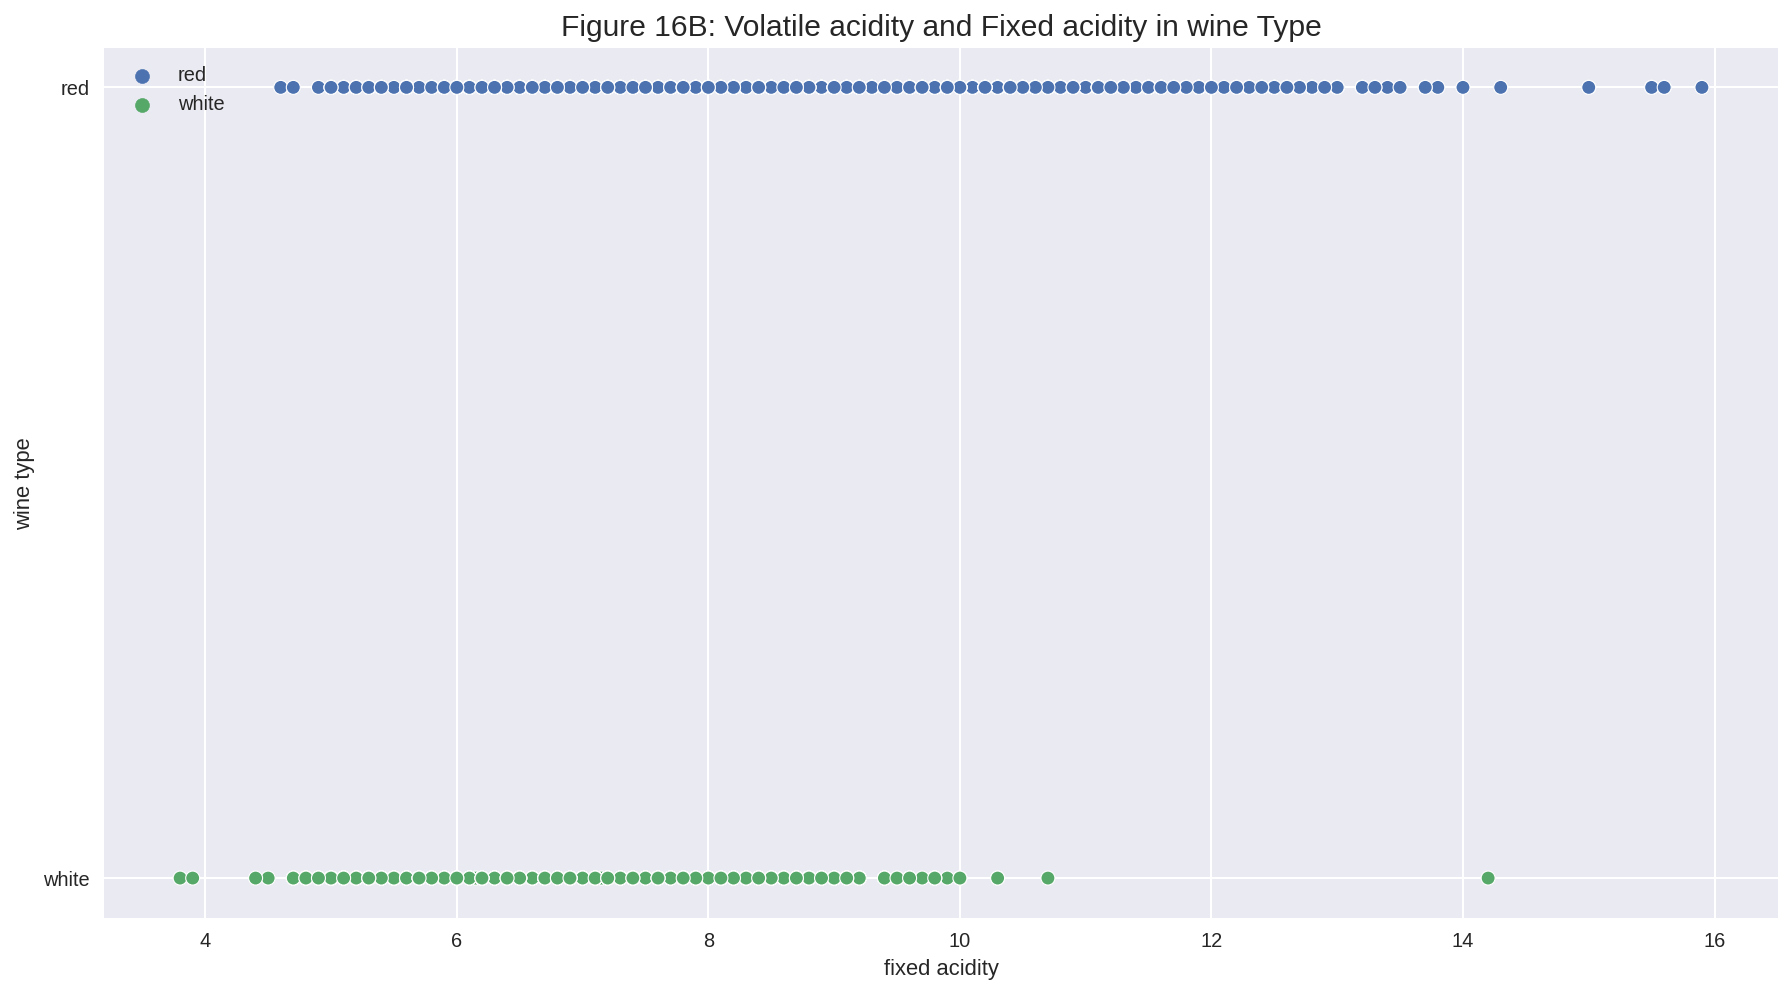

In [278]:
#Volatile Acidicty and Fixed acidity in Wines 
plt.figure(figsize = (15,8))
sns.scatterplot(df["fixed acidity"], df['wine type'],hue = df['wine type'] )
plt.title('Figure 16B: Volatile acidity and Fixed acidity in wine Type', fontsize = 15);
plt.legend()
plt.show();


Volatile and fixed acidity propotions in quality wines greater then 5:
To test if there is a pattern of acidity propotions with quality
 

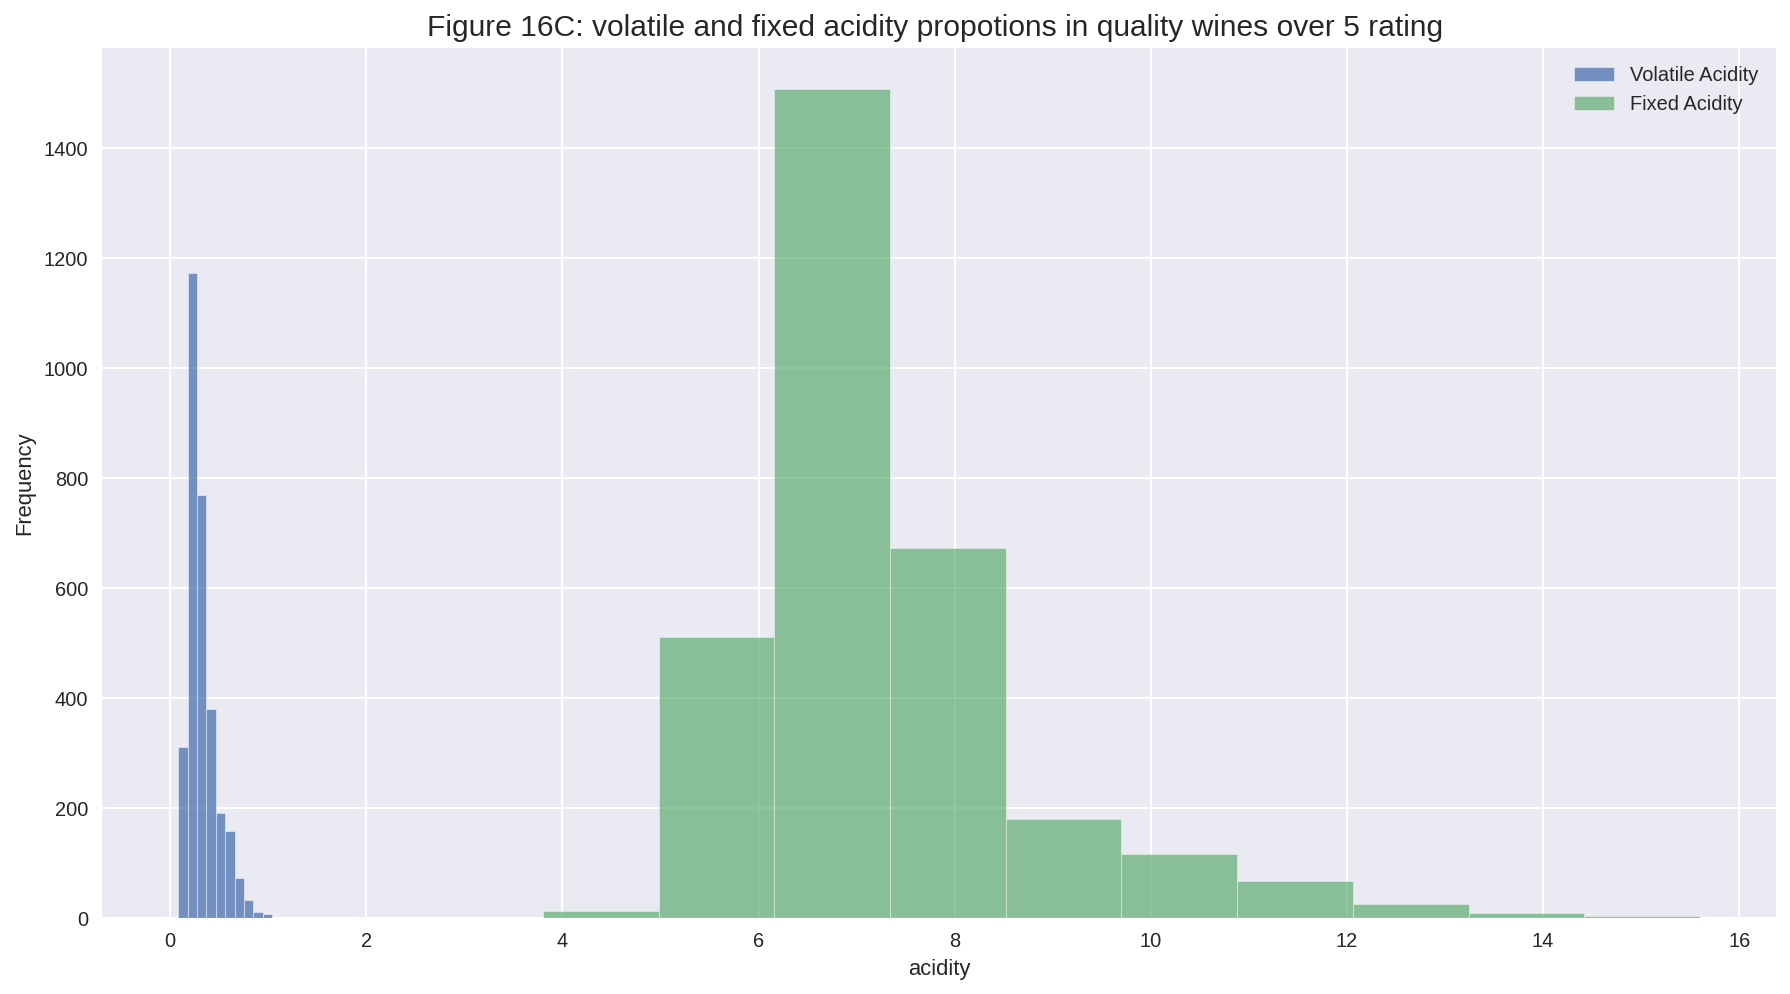

In [279]:
# Volatile and fixed acidity propotions in quality wines greater then 5
new_data1 = df[ df['quality']> 5]

plt.figure(figsize = (15,8))

plt.hist(new_data1['volatile acidity'], color='b', alpha=0.75, label='Volatile Acidity')
plt.hist(new_data1['fixed acidity'], color='g', alpha=0.65, label='Fixed Acidity')

plt.title('Figure 16C: volatile and fixed acidity propotions in quality wines over 5 rating ', fontsize = 15);
plt.legend(loc = 'upper right')
plt.xlabel("acidity")
plt.ylabel("Frequency")
plt.show();

## Literature review

Studies with sulphur dioxide and quality, it was reasonably concluded that the less free sulphur dioxide, the better wine quality as shown in figure 9. There is a similar correlation to the study conducted as documented by (Volatile Acidity, 1990) on how " volatile acidity is used routinely as a indicator of wine spoilage". The reason this is an important correlation to this research is that,  (Volatile Acidity, 1990) also indicates "volatile acid content may be made by carbon dioxide (as carbonic acid), sulphur dioxide (as sulphurous acid)". Doubling down on the conclusion made by this data set that less sulphur dioxide causes better wine quality.  However in (Effect of high pressure.., 2013) it is argued that pressurised amounts of sulphur  actually have better resultant global sensorial assessment, "w ith the pressure treatments imparting aged-like characteristics to the wines". This may hint at the data-set being unable to show properly quality assessments of wine in this case study. 



Similarly to (Boulton, 1980), which a reasonable distinction between titratable acidity i.e. fixed acidity and ph was made. We also have concluded a similar correlation. In figure 2, there seems to have negative relationship between fixed acidity and PH levels. Though however our data set doesn't indicate what the possible mechanism unlike (Boulton, 1980) study.


In criticism of this data set, according to (Er, 2016), where it was concluded, "there are 6 quality classes of red wine and 7 quality classes of white wine". This indicates our current dataset may not be as accurate as it can be in terms of both the red win and white wine quality and its correlation with physiochemical attributes ie "quality classes". This could also explain why have more average quality wines than any other data set. In fact in (Research on Red Wine Quality Based on Data Visualization, 2020), it demands there need to be 12 factors in determining the quality of wines. So the research is a bit mixed in this area and therefore this data must be further reviewed and improved on.


One obvious rating lacking in this data set is actual data of wine tasting experiments and scores, on each wine. Obviously this is a huge importance signifance as wine is meant for consumption, and it would be difficult for companies and consumers to choose which wines to replicate or choose. However (Tastersâ Bias in Wine Guidesâ Quality Evaluations, n.d.) indicates there can lead upto heavy biases namely due to generosity and personal preferences by the tester. Though these are big biases and can lead to very fault scores, it is important somehow implement these type of scores for the benefit of wine companies and consumers as stated in (Tastersâ Bias in Wine Guidesâ Quality Evaluations, n.d.) . 
(Martuscelli et al., 2013), talks about how amines are useful as quality index for wines, "The single amines significantly correlated with their sum were putrescine, histamine and tyramine, even if reached levels were below toxicity threshold, demonstrating a good quality" , this could be helpful and useful indicator to add into further future data sets. 


It is important to realize, that it would be beneficial to follow data mining approach to predict human preferences in wine, as proposed by (Cortez et al., 2009) and (Using Data Mining for Wine Quality Assessment, 2009). They introduced the use of "three regression techniques, under a computationally efficient procedure that performs simultaneous variable and model selection", this out performed neural network and multiple regression methods. 












### References



**Journals**:

Santos, M. C., Nunes, C., Cappelle, J., Gonçalves, F. J., Rodrigues, A., Saraiva, J. A., &amp; Coimbra, M. A. (2013, May 18). Effect of high pressure treatments on the physicochemical properties of a sulphur dioxide-free red wine. Food Chemistry. Retrieved October 2, 2022, from https://www.sciencedirect.com/science/article/abs/pii/S0308814613006055 


Martuscelli, M., Arfelli, G., Manetta, A. C., &amp; Suzzi, G. (2013, January 16). Biogenic amines content as a measure of the quality of wines of Abruzzo (Italy). Food Chemistry. Retrieved October 2, 2022, from https://www.sciencedirect.com/science/article/abs/pii/S0308814613000101 


Er, Y. (2016, December 26). The Classification of White Wine and Red Wine According to Their Physicochemical Qualities. Retrieved October 1, 2022, from https://dergipark.org.tr/en/pub/ijisae/issue/25999/265954#article_cite



Boulton, R. (1980, January 1). The Relationships between Total Acidity, Titratable Acidity and pH in Wine. American Journal of Enology and Viticulture. Retrieved October 1, 2022, from https://www.ajevonline.org/content/31/1/76.abstract


Zoecklein, B.W., Fugelsang, K.C., Gump, B.H., Nury, F.S. (1990). Volatile Acidity. In: Production Wine Analysis. Springer, Boston, MA. https://doi.org/10.1007/978-1-4615-8146-8_5 


J.C.M. Fornachon Industrial & Engineering Chemistry Analytical Edition 1946 18 (12), 790-793
DOI: 10.1021/i560160a018

Cortez, P., Cerdeira, A., Almeida, F., Matos, T., &amp; Reis, J. (2009, June 9). Modeling wine preferences by data mining from physicochemical properties. Decision Support Systems. Retrieved October 2, 2022, from https://www.sciencedirect.com/science/article/abs/pii/S0167923609001377 


**Conference papers:**

Research on Red Wine Quality Based on Data Visualization. (2020, May 1). IEEE Conference Publication | IEEE Xplore. Retrieved October 2, 2022, from https://ieeexplore.ieee.org/abstract/document/9137477?casa_token=1WGJK6fQdTkAAAAA:O36_Kg4OWjUhMNvd6kAyuO7zsGVKEPmQdVQTxLXFX1ogD_8sd869grguE-LVo4yzVh1D2AjGnw


Tastersâ bias in wine guidesâ quality evaluations. (n.d.). Taylor & Francis. Retrieved October 2, 2022, from https://www.tandfonline.com/doi/full/10.1080/13504851.2013.797552?casa_token=5ByTmpninW8AAAAA%3AjjDoX0TktgpKTf8Zaiii5OuZadPBQhLuiiXM_bJgGSBSlwT2F7-KoETWHYfg5alPWwTU4rptYh72Bg 

Using Data Mining for Wine Quality Assessment. (2009, January 1). SpringerLink. Retrieved October 2, 2022, from https://link.springer.com/chapter/10.1007/978-3-642-04747-3_8?error=cookies_not_supported&code=4a666147-711c-4edf-be39-9900952fdca6

## Summary & Conclusion

For phase 1 of this assignment, the group chose a dataset with various physiochemical variables that would help in determining the quality of wine. This dataset is considered to be quite controversial in our group as the response variable is a subjective measure, determined by three trained judges. The independent variables will determine if the scoring of the judges were not biased. 

During the exploration of the data variables, we have found that a majority of them are related to different types of acidity, for example, pH which determines the overall acidity of the wine. When cleaning and pre-processing the data, we have found the dataset to be mostly clean and had no missing variables. We found plots somewhat difficult to create as majority of the variables lead to similar results when predicting the score for wine.
